[*********************100%***********************]  1 of 1 completed

Data successfully retrieved for Nvidia.
Price           Close       High        Low       Open     Volume
Ticker           NVDA       NVDA       NVDA       NVDA       NVDA
Date                                                             
2024-01-02  48.154346  49.281026  47.581511  49.230042  411254000
2024-01-03  47.555515  48.170339  47.306585  47.471539  320896000
2024-01-04  47.984398  48.486255  47.494535  47.753461  306535000
2024-01-05  49.083080  49.532953  48.292304  48.448262  415039000
2024-01-08  52.238186  52.260183  49.464974  49.497966  642510000

Monthly Returns:
Date
2024-01-31         NaN
2024-02-29    0.285810
2024-03-31    0.142181
2024-04-30   -0.043760
2024-05-31    0.268871
2024-06-30    0.126943
2024-07-31   -0.052776
2024-08-31    0.020082
2024-09-30    0.017428
2024-10-31    0.093215
2024-11-30    0.041353
2024-12-31   -0.028577
2025-01-31    0.002011
Freq: ME, Name: Close, dtype: float64

Monthly Volatility:
Date
2024-01-31    0.019786
2024-02-29    0.043006


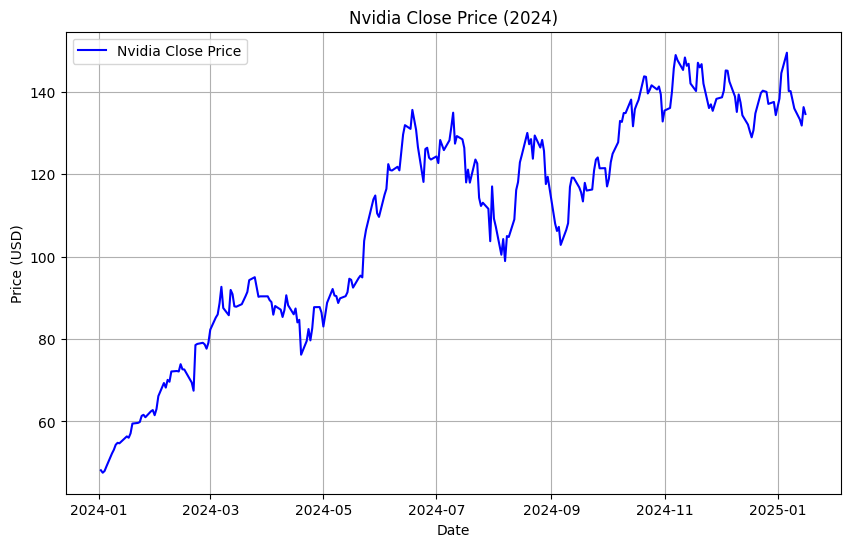

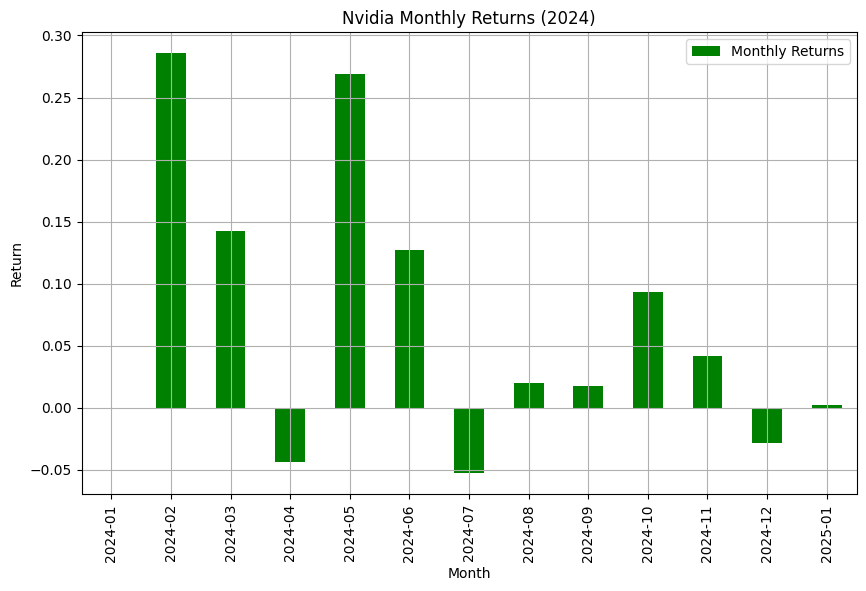

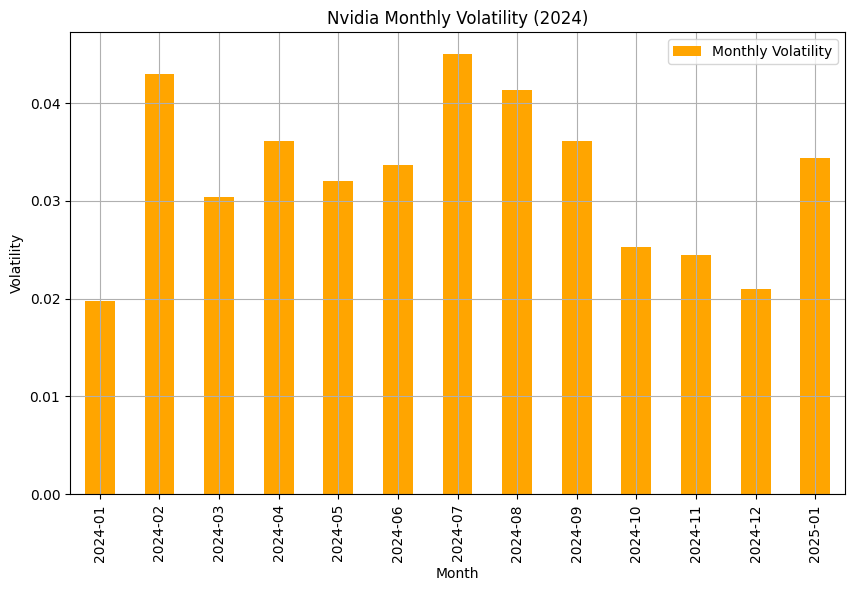

In [45]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Download Nvidia data
try:
    nvidia_data = yf.download("NVDA", start="2024-01-01", end="2025-12-31", interval="1d")
    
    # Ensure data is available
    if nvidia_data.empty:
        print("No data available for Nvidia. Please check the ticker or source.")
    else:
        print("Data successfully retrieved for Nvidia.")
        print(nvidia_data.head())

        # Step 2: Flatten columns if MultiIndex is present
        if isinstance(nvidia_data.columns, pd.MultiIndex):
            nvidia_data.columns = [col[0] for col in nvidia_data.columns]

        # Step 3: Calculate daily returns
        nvidia_data['Daily Return'] = nvidia_data['Close'].pct_change()

        # Step 4: Resample to monthly data and calculate returns and volatility
        monthly_returns = nvidia_data['Close'].resample('ME').ffill().pct_change()
        monthly_volatility = nvidia_data['Daily Return'].resample('ME').std()

        # Step 5: Calculate annual return and volatility
        annual_return = nvidia_data['Close'].iloc[-1] / nvidia_data['Close'].iloc[0] - 1
        annual_volatility = nvidia_data['Daily Return'].std() * np.sqrt(252)  # 252 trading days in a year

        # Step 6: Print results
        print("\nMonthly Returns:")
        print(monthly_returns)
        print("\nMonthly Volatility:")
        print(monthly_volatility)
        print(f"\nAnnual Return: {annual_return:.2%}")
        print(f"Annual Volatility: {annual_volatility:.2%}")

        # Step 7: Plot adjusted closing prices
        plt.figure(figsize=(10, 6))
        plt.plot(nvidia_data.index, nvidia_data['Close'], label="Nvidia Close Price", color="blue")
        plt.title("Nvidia Close Price (2024)")
        plt.xlabel("Date")
        plt.ylabel("Price (USD)")
        plt.legend()
        plt.grid()
        plt.show()

        # Format the index to display only the month and year
        monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
        monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')

        # Plot monthly returns
        plt.figure(figsize=(10, 6))
        monthly_returns.plot(kind='bar', color="green", label="Monthly Returns")
        plt.title("Nvidia Monthly Returns (2024)")
        plt.xlabel("Month")
        plt.ylabel("Return")
        plt.legend()
        plt.grid()
        plt.show()

        # Plot monthly volatility
        plt.figure(figsize=(10, 6))
        monthly_volatility.plot(kind='bar', color="orange", label="Monthly Volatility")
        plt.title("Nvidia Monthly Volatility (2024)")
        plt.xlabel("Month")
        plt.ylabel("Volatility")
        plt.legend()
        plt.grid()
        plt.show()

except Exception as e:
    print(f"Error processing Nvidia data: {e}")


🔄 Récupération des données pour HO.PA...
✅ Données récupérées pour HO.PA.

📊 Statistiques de Thalès (HO.PA)
📈 Rendement Annuel : 3.03%
📉 Volatilité Annuelle : 24.87%


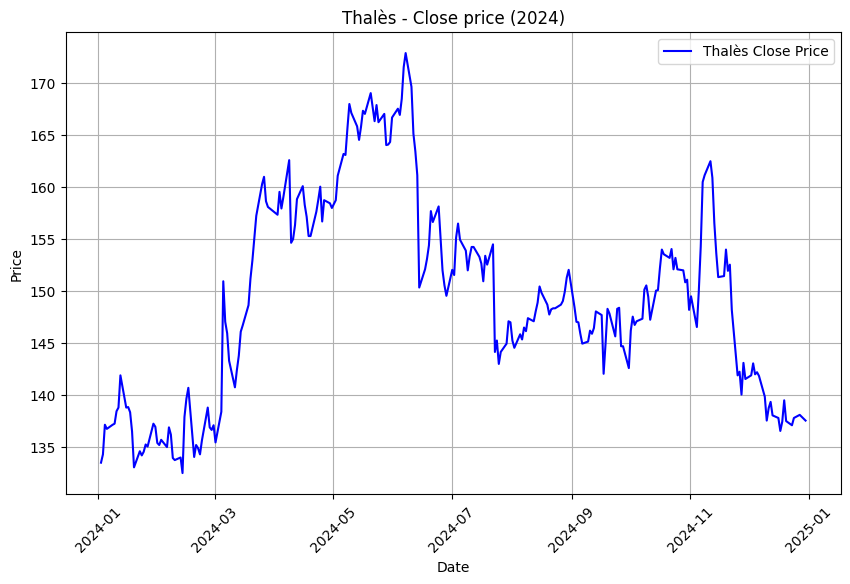

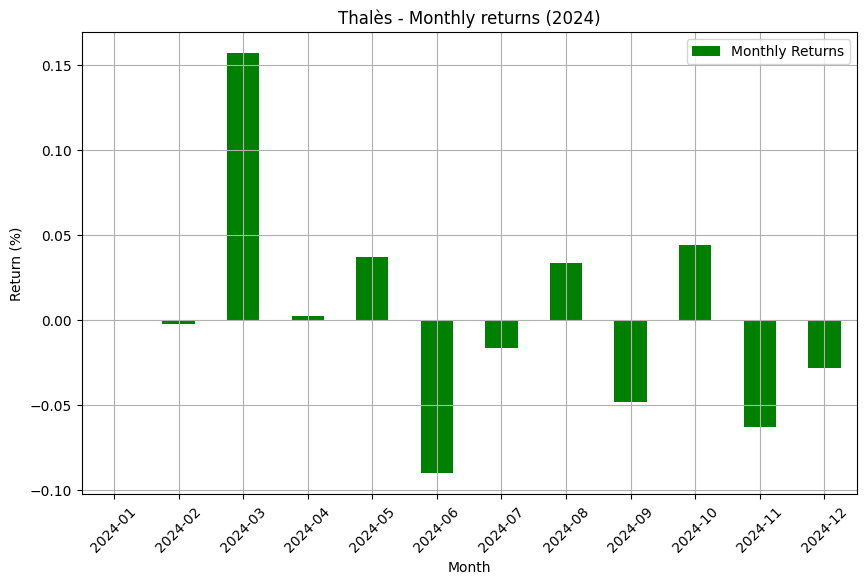

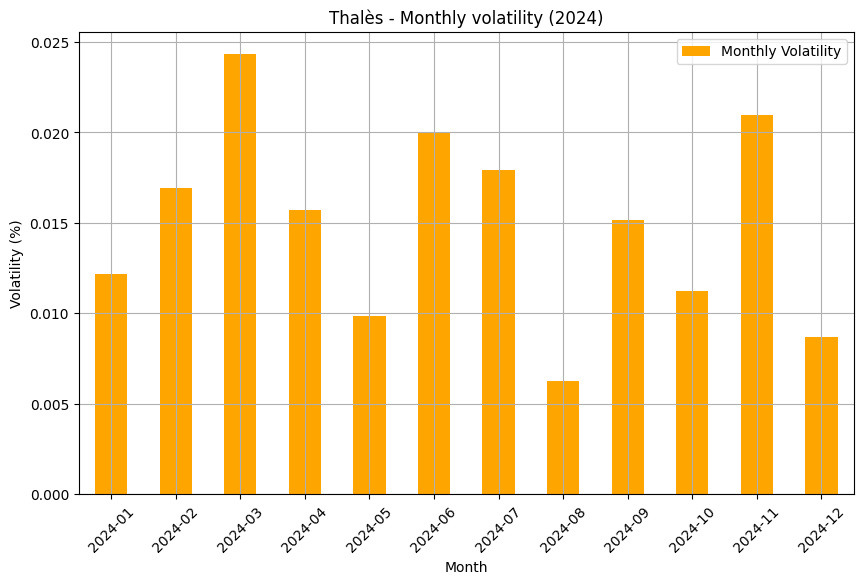

✅ Données enregistrées dans 'thales_historical_data.csv'.


In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Définition de la période
start_date = "2024-01-01"
end_date = "2024-12-31"

start_timestamp = int(pd.Timestamp(start_date).timestamp())  # Début en timestamp UNIX
end_timestamp = int(pd.Timestamp(end_date).timestamp())  # Fin en timestamp UNIX

# Ticker de Thalès sur Yahoo Finance
thales_ticker = "HO.PA"

def fetch_data(ticker, start_timestamp, end_timestamp):
    """Télécharge les prix de clôture pour un actif en une seule requête"""
    print(f"🔄 Récupération des données pour {ticker}...")

    url = f"https://query2.finance.yahoo.com/v8/finance/chart/{ticker}?period1={start_timestamp}&period2={end_timestamp}&interval=1d"
    
    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        data = response.json()

        timestamps = data["chart"]["result"][0]["timestamp"]
        prices = data["chart"]["result"][0]["indicators"]["quote"][0]["close"]

        # Convertir timestamps en DatetimeIndex
        dates = pd.to_datetime(timestamps, unit="s")
        price_series = pd.Series(prices, index=dates)

        print(f"✅ Données récupérées pour {ticker}.")
        return price_series

    except Exception as e:
        print(f"❌ Erreur lors de la récupération des données pour {ticker}: {e}")
        return None

# Récupérer les données de Thalès
thales_prices = fetch_data(thales_ticker, start_timestamp, end_timestamp)

if thales_prices is not None:
    # Convertir en DataFrame et forcer l'index en DatetimeIndex
    thales_df = pd.DataFrame(thales_prices, columns=["Close"])
    thales_df.index = pd.to_datetime(thales_df.index)  # 🔥 Correction ici 🔥
    thales_df.index.name = "Date"

    # Calculer les rendements quotidiens
    thales_df["Daily Return"] = thales_df["Close"].pct_change()

    # Calculer les rendements et volatilités mensuels
    monthly_returns = thales_df["Close"].resample("ME").ffill().pct_change()
    monthly_volatility = thales_df["Daily Return"].resample("ME").std()

    # Calculer rendement et volatilité annuels
    annual_return = thales_df["Close"].iloc[-1] / thales_df["Close"].iloc[0] - 1
    annual_volatility = thales_df["Daily Return"].std() * (252**0.5)  # 252 jours de trading

    # Afficher les résultats
    print("\n📊 Statistiques de Thalès (HO.PA)")
    print(f"📈 Rendement Annuel : {annual_return:.2%}")
    print(f"📉 Volatilité Annuelle : {annual_volatility:.2%}")

    # 📌 **Graphique 1 : Prix de clôture**
    plt.figure(figsize=(10, 6))
    plt.plot(thales_df.index, thales_df["Close"], label="Thalès Close Price", color="blue")
    plt.title("Thalès - Close price (2024)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # 📌 **Graphique 2 : Rendements mensuels**
    plt.figure(figsize=(10, 6))
    monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
    monthly_returns.plot(kind='bar', color="green", label="Monthly Returns")
    plt.title("Thalès - Monthly returns (2024)")
    plt.xlabel("Month")
    plt.ylabel("Return (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # 📌 **Graphique 3 : Volatilité mensuelle**
    plt.figure(figsize=(10, 6))
    monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')
    monthly_volatility.plot(kind='bar', color="orange", label="Monthly Volatility")
    plt.title("Thalès - Monthly volatility (2024)")
    plt.xlabel("Month")
    plt.ylabel("Volatility (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # Sauvegarde des données au format CSV
    thales_df.to_csv("thales_historical_data.csv")
    print("✅ Données enregistrées dans 'thales_historical_data.csv'.")

else:
    print("⚠️ Aucune donnée disponible pour Thalès.")

🔄 Récupération des données pour KC=F...
✅ Données récupérées pour KC=F.

📊 Coffee KC=F Returns
📈 Annual returns : 68.81%
📉 Annual volatility : 35.86%


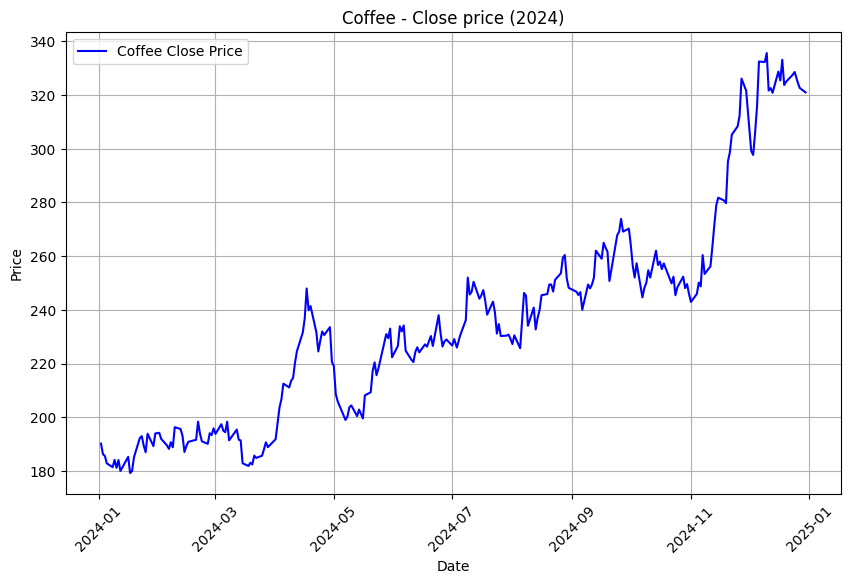

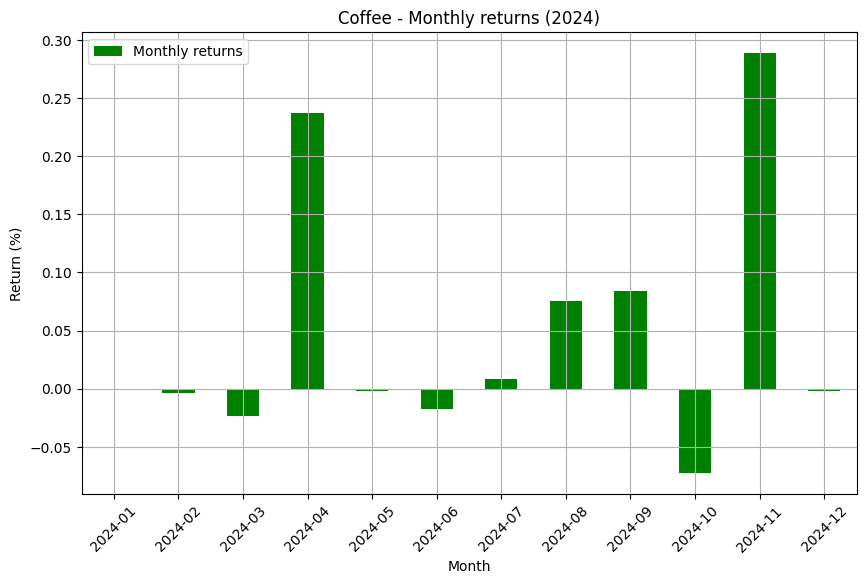

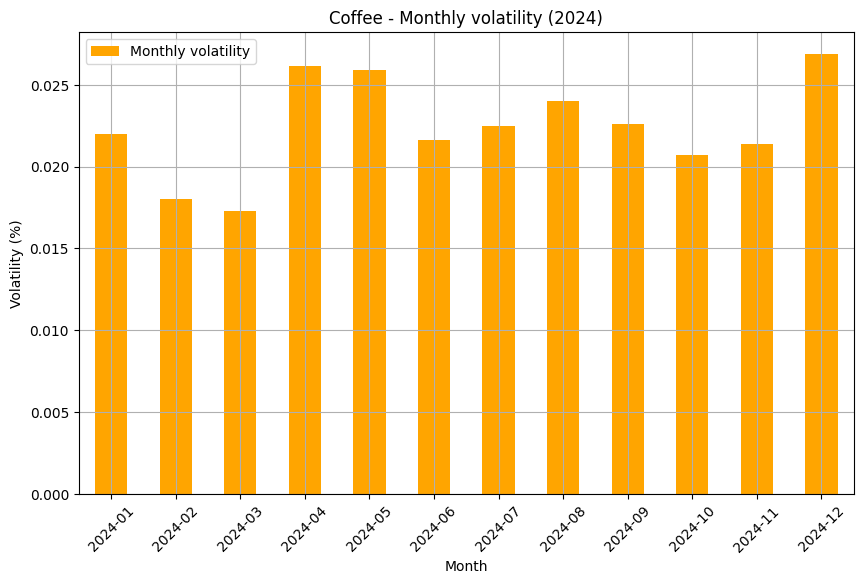

✅ Données enregistrées dans 'coffee_historical_data.csv'.


In [17]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Définition de la période
start_date = "2024-01-01"
end_date = "2024-12-31"

start_timestamp = int(pd.Timestamp(start_date).timestamp())  # Début en timestamp UNIX
end_timestamp = int(pd.Timestamp(end_date).timestamp())  # Fin en timestamp UNIX

# Ticker du Coffee sur Yahoo Finance
coffee_ticker = "KC=F"

def fetch_data(ticker, start_timestamp, end_timestamp):
    """Télécharge les prix de clôture pour un actif en une seule requête"""
    print(f"🔄 Récupération des données pour {ticker}...")

    url = f"https://query2.finance.yahoo.com/v8/finance/chart/{ticker}?period1={start_timestamp}&period2={end_timestamp}&interval=1d"
    
    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        data = response.json()

        timestamps = data["chart"]["result"][0]["timestamp"]
        prices = data["chart"]["result"][0]["indicators"]["quote"][0]["close"]

        # Convertir timestamps en DatetimeIndex
        dates = pd.to_datetime(timestamps, unit="s")
        price_series = pd.Series(prices, index=dates)

        print(f"✅ Données récupérées pour {ticker}.")
        return price_series

    except Exception as e:
        print(f"❌ Erreur lors de la récupération des données pour {ticker}: {e}")
        return None

# Récupérer les données
coffee_prices = fetch_data(coffee_ticker, start_timestamp, end_timestamp)

if coffee_prices is not None:
    # Convertir en DataFrame et forcer l'index en DatetimeIndex
    coffee_df = pd.DataFrame(coffee_prices, columns=["Close"])
    coffee_df.index = pd.to_datetime(coffee_df.index)  
    coffee_df.index.name = "Date"

    # Calculer les rendements quotidiens
    coffee_df["Daily Return"] = coffee_df["Close"].pct_change()

    # Calculer les rendements et volatilités mensuels
    monthly_returns = coffee_df["Close"].resample("ME").ffill().pct_change()
    monthly_volatility = coffee_df["Daily Return"].resample("ME").std()

    # Calculer rendement et volatilité annuels
    annual_return = coffee_df["Close"].iloc[-1] / coffee_df["Close"].iloc[0] - 1
    annual_volatility = coffee_df["Daily Return"].std() * (252**0.5)  # 252 jours de trading

    # Afficher les résultats
    print("\n📊 Coffee KC=F Returns")
    print(f"📈 Annual returns : {annual_return:.2%}")
    print(f"📉 Annual volatility : {annual_volatility:.2%}")

    # 📌 **Graphique 1 : Prix de clôture**
    plt.figure(figsize=(10, 6))
    plt.plot(coffee_df.index, coffee_df["Close"], label="Coffee Close Price", color="blue")
    plt.title("Coffee - Close price (2024)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # 📌 **Graphique 2 : Rendements mensuels**
    plt.figure(figsize=(10, 6))
    monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
    monthly_returns.plot(kind='bar', color="green", label="Monthly returns")
    plt.title("Coffee - Monthly returns (2024)")
    plt.xlabel("Month")
    plt.ylabel("Return (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # 📌 **Graphique 3 : Volatilité mensuelle**
    plt.figure(figsize=(10, 6))
    monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')
    monthly_volatility.plot(kind='bar', color="orange", label="Monthly volatility")
    plt.title("Coffee - Monthly volatility (2024)")
    plt.xlabel("Month")
    plt.ylabel("Volatility (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # Sauvegarde des données au format CSV
    coffee_df.to_csv("coffee_historical_data.csv")
    print("✅ Données enregistrées dans 'coffee_historical_data.csv'.")

else:
    print("⚠️ Aucune donnée disponible pour Coffee.")

🔄 Récupération des données pour CC=F...
✅ Données récupérées pour CC=F.

📊 Cocoa CC=F Returns
📈 Annual returns : 169.17%
📉 Annual volatility : 71.10%


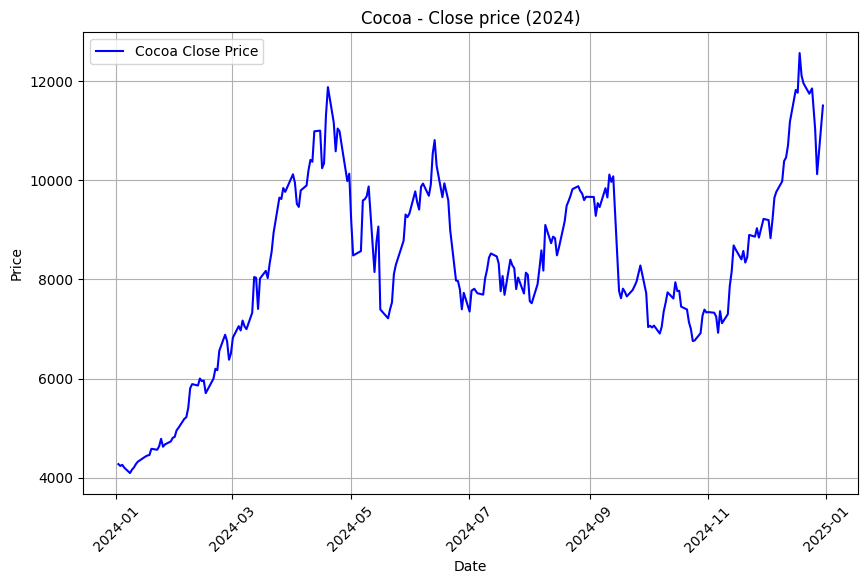

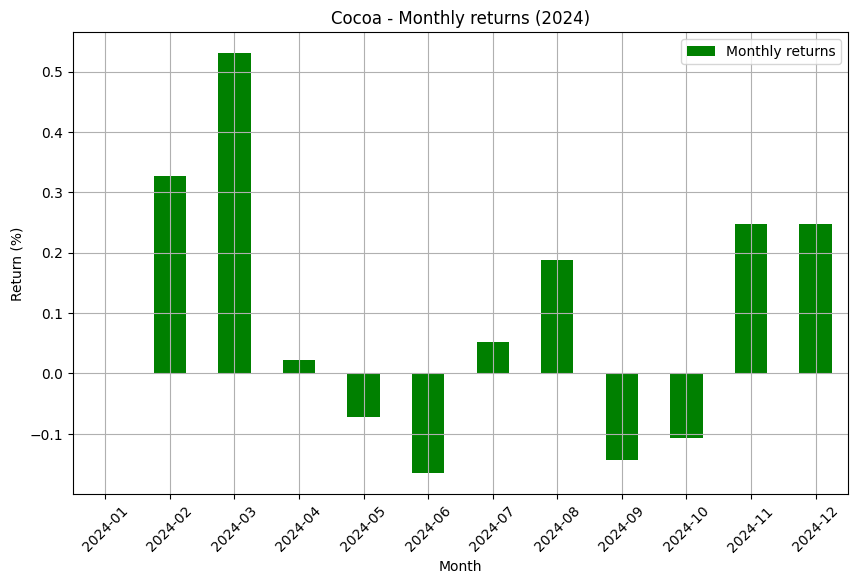

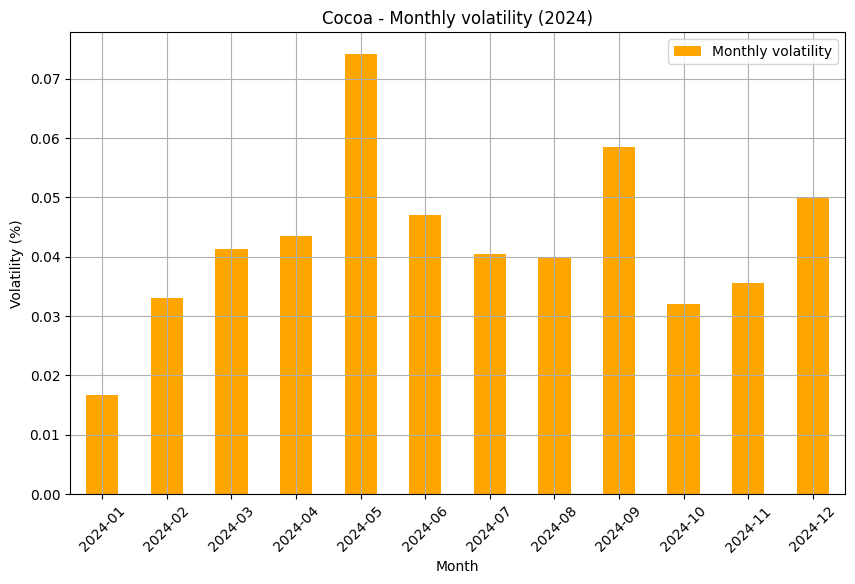

✅ Données enregistrées dans 'cocoa_historical_data.csv'.


In [19]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Définition de la période
start_date = "2024-01-01"
end_date = "2024-12-31"

start_timestamp = int(pd.Timestamp(start_date).timestamp())  # Début en timestamp UNIX
end_timestamp = int(pd.Timestamp(end_date).timestamp())  # Fin en timestamp UNIX

# Ticker du Cacao sur Yahoo Finance
cocoa_ticker = "CC=F"

def fetch_data(ticker, start_timestamp, end_timestamp):
    """Télécharge les prix de clôture pour un actif en une seule requête"""
    print(f"🔄 Récupération des données pour {ticker}...")

    url = f"https://query2.finance.yahoo.com/v8/finance/chart/{ticker}?period1={start_timestamp}&period2={end_timestamp}&interval=1d"
    
    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        data = response.json()

        timestamps = data["chart"]["result"][0]["timestamp"]
        prices = data["chart"]["result"][0]["indicators"]["quote"][0]["close"]

        # Convertir timestamps en DatetimeIndex
        dates = pd.to_datetime(timestamps, unit="s")
        price_series = pd.Series(prices, index=dates)

        print(f"✅ Données récupérées pour {ticker}.")
        return price_series

    except Exception as e:
        print(f"❌ Erreur lors de la récupération des données pour {ticker}: {e}")
        return None

# Récupérer les données
cocoa_prices = fetch_data(cocoa_ticker, start_timestamp, end_timestamp)

if cocoa_prices is not None:
    # Convertir en DataFrame et forcer l'index en DatetimeIndex
    cocoa_df = pd.DataFrame(cocoa_prices, columns=["Close"])
    cocoa_df.index = pd.to_datetime(cocoa_df.index)  
    cocoa_df.index.name = "Date"

    # Calculer les rendements quotidiens
    cocoa_df["Daily Return"] = cocoa_df["Close"].pct_change()

    # Calculer les rendements et volatilités mensuels
    monthly_returns = cocoa_df["Close"].resample("ME").ffill().pct_change()
    monthly_volatility = cocoa_df["Daily Return"].resample("ME").std()

    # Calculer rendement et volatilité annuels
    annual_return = cocoa_df["Close"].iloc[-1] / cocoa_df["Close"].iloc[0] - 1
    annual_volatility = cocoa_df["Daily Return"].std() * (252**0.5)  # 252 jours de trading

    # Afficher les résultats
    print("\n📊 Cocoa CC=F Returns")
    print(f"📈 Annual returns : {annual_return:.2%}")
    print(f"📉 Annual volatility : {annual_volatility:.2%}")

    # 📌 **Graphique 1 : Prix de clôture**
    plt.figure(figsize=(10, 6))
    plt.plot(cocoa_df.index, cocoa_df["Close"], label="Cocoa Close Price", color="blue")
    plt.title("Cocoa - Close price (2024)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # 📌 **Graphique 2 : Rendements mensuels**
    plt.figure(figsize=(10, 6))
    monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
    monthly_returns.plot(kind='bar', color="green", label="Monthly returns")
    plt.title("Cocoa - Monthly returns (2024)")
    plt.xlabel("Month")
    plt.ylabel("Return (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # 📌 **Graphique 3 : Volatilité mensuelle**
    plt.figure(figsize=(10, 6))
    monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')
    monthly_volatility.plot(kind='bar', color="orange", label="Monthly volatility")
    plt.title("Cocoa - Monthly volatility (2024)")
    plt.xlabel("Month")
    plt.ylabel("Volatility (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # Sauvegarde des données au format CSV
    cocoa_df.to_csv("cocoa_historical_data.csv")
    print("✅ Données enregistrées dans 'cocoa_historical_data.csv'.")

else:
    print("⚠️ Aucune donnée disponible pour Cocoa.")

🔄 Récupération des données pour JNJ...
✅ Données récupérées pour JNJ.

📊 Johnson and Johnson Returns
📈 Annual returns : -10.40%
📉 Annual volatility : 15.18%


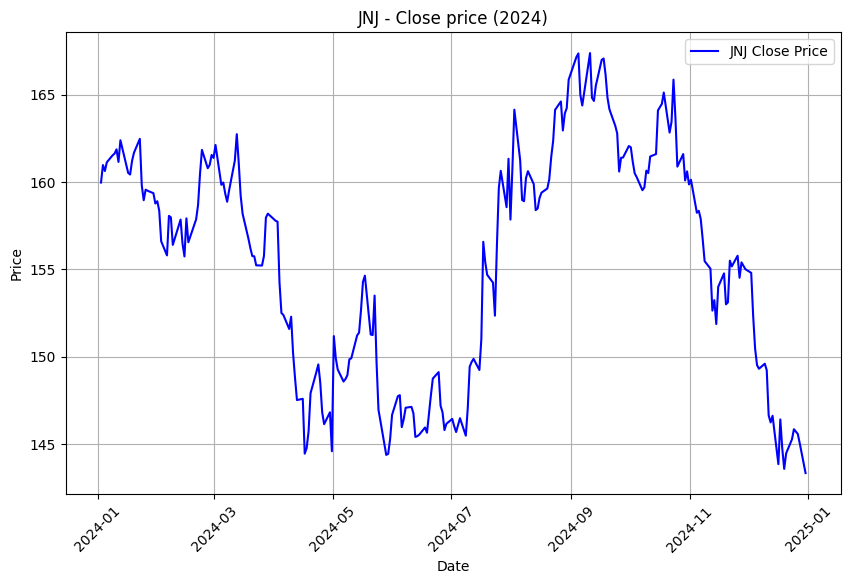

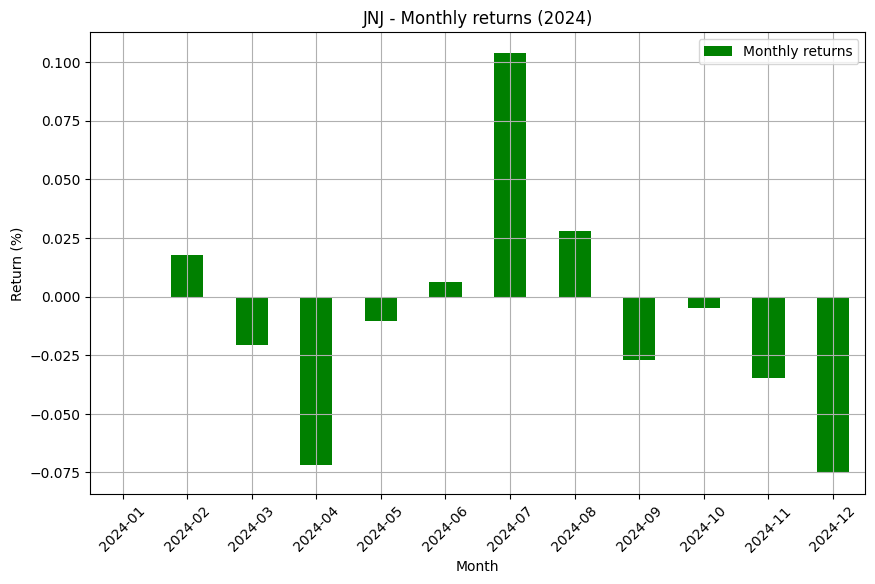

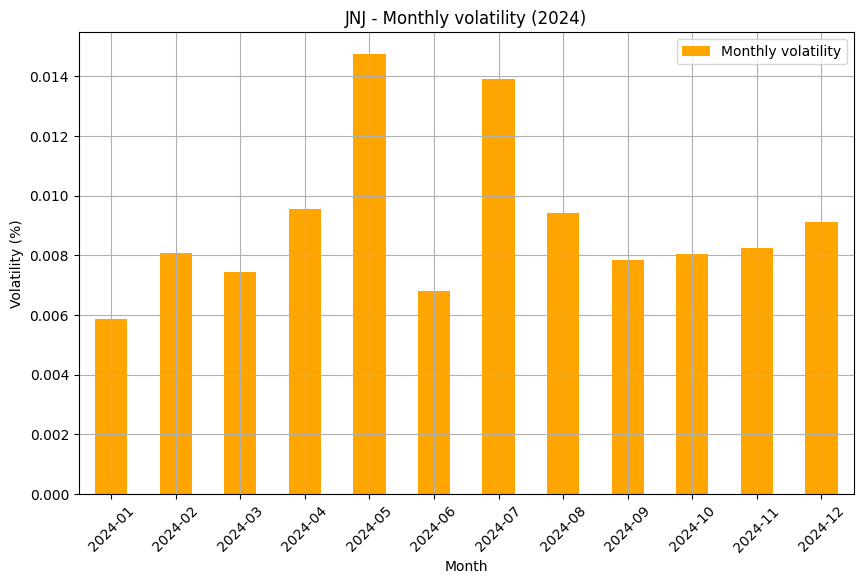

✅ Données enregistrées dans 'jnj_historical_data.csv'.


In [25]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Définition de la période
start_date = "2024-01-01"
end_date = "2024-12-31"

start_timestamp = int(pd.Timestamp(start_date).timestamp())  # Début en timestamp UNIX
end_timestamp = int(pd.Timestamp(end_date).timestamp())  # Fin en timestamp UNIX

# Ticker de Johnson and Johnson sur Yahoo Finance
jnj_ticker = "JNJ"

def fetch_data(ticker, start_timestamp, end_timestamp):
    """Télécharge les prix de clôture pour un actif en une seule requête"""
    print(f"🔄 Récupération des données pour {ticker}...")

    url = f"https://query2.finance.yahoo.com/v8/finance/chart/{ticker}?period1={start_timestamp}&period2={end_timestamp}&interval=1d"
    
    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        data = response.json()

        timestamps = data["chart"]["result"][0]["timestamp"]
        prices = data["chart"]["result"][0]["indicators"]["quote"][0]["close"]

        # Convertir timestamps en DatetimeIndex
        dates = pd.to_datetime(timestamps, unit="s")
        price_series = pd.Series(prices, index=dates)

        print(f"✅ Données récupérées pour {ticker}.")
        return price_series

    except Exception as e:
        print(f"❌ Erreur lors de la récupération des données pour {ticker}: {e}")
        return None

# Récupérer les données
jnj_prices = fetch_data(jnj_ticker, start_timestamp, end_timestamp)

if jnj_prices is not None:
    # Convertir en DataFrame et forcer l'index en DatetimeIndex
    jnj_df = pd.DataFrame(jnj_prices, columns=["Close"])
    jnj_df.index = pd.to_datetime(jnj_df.index)  
    jnj_df.index.name = "Date"

    # Calculer les rendements quotidiens
    jnj_df["Daily Return"] = jnj_df["Close"].pct_change()

    # Calculer les rendements et volatilités mensuels
    monthly_returns = jnj_df["Close"].resample("ME").ffill().pct_change()
    monthly_volatility = jnj_df["Daily Return"].resample("ME").std()

    # Calculer rendement et volatilité annuels
    annual_return = jnj_df["Close"].iloc[-1] / jnj_df["Close"].iloc[0] - 1
    annual_volatility = jnj_df["Daily Return"].std() * (252**0.5)  # 252 jours de trading

    # Afficher les résultats
    print("\n📊 Johnson and Johnson Returns")
    print(f"📈 Annual returns : {annual_return:.2%}")
    print(f"📉 Annual volatility : {annual_volatility:.2%}")

    # 📌 **Graphique 1 : Prix de clôture**
    plt.figure(figsize=(10, 6))
    plt.plot(jnj_df.index, jnj_df["Close"], label="JNJ Close Price", color="blue")
    plt.title("JNJ - Close price (2024)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # 📌 **Graphique 2 : Rendements mensuels**
    plt.figure(figsize=(10, 6))
    monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
    monthly_returns.plot(kind='bar', color="green", label="Monthly returns")
    plt.title("JNJ - Monthly returns (2024)")
    plt.xlabel("Month")
    plt.ylabel("Return (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # 📌 **Graphique 3 : Volatilité mensuelle**
    plt.figure(figsize=(10, 6))
    monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')
    monthly_volatility.plot(kind='bar', color="orange", label="Monthly volatility")
    plt.title("JNJ - Monthly volatility (2024)")
    plt.xlabel("Month")
    plt.ylabel("Volatility (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # Sauvegarde des données au format CSV
    jnj_df.to_csv("jnj_historical_data.csv")
    print("✅ Données enregistrées dans 'jnj_historical_data.csv'.")

else:
    print("⚠️ Aucune donnée disponible pour JNJ.")

[*********************100%***********************]  1 of 1 completed

Data successfully retrieved for USD Index (DXY):
Price            Close        High         Low        Open   Volume
Ticker        DX-Y.NYB    DX-Y.NYB    DX-Y.NYB    DX-Y.NYB DX-Y.NYB
Date                                                               
2024-01-02  102.199997  102.250000  101.339996  101.419998        0
2024-01-03  102.459999  102.730003  102.080002  102.150002        0
2024-01-04  102.419998  102.529999  102.150002  102.459999        0
2024-01-05  102.410004  103.099998  101.910004  102.400002        0
2024-01-08  102.209999  102.620003  102.080002  102.440002        0

Monthly Returns:
Date
2024-01-31         NaN
2024-02-29    0.008618
2024-03-31    0.003744
2024-04-30    0.015973
2024-05-31   -0.014592
2024-06-30    0.011465
2024-07-31   -0.016719
2024-08-31   -0.023055
2024-09-30   -0.009046
2024-10-31    0.031752
2024-11-30    0.016926
2024-12-31    0.022603
Freq: ME, Name: Close, dtype: float64

Monthly Volatility:
Date
2024-01-31    0.002889
2024-02-29    0.00323

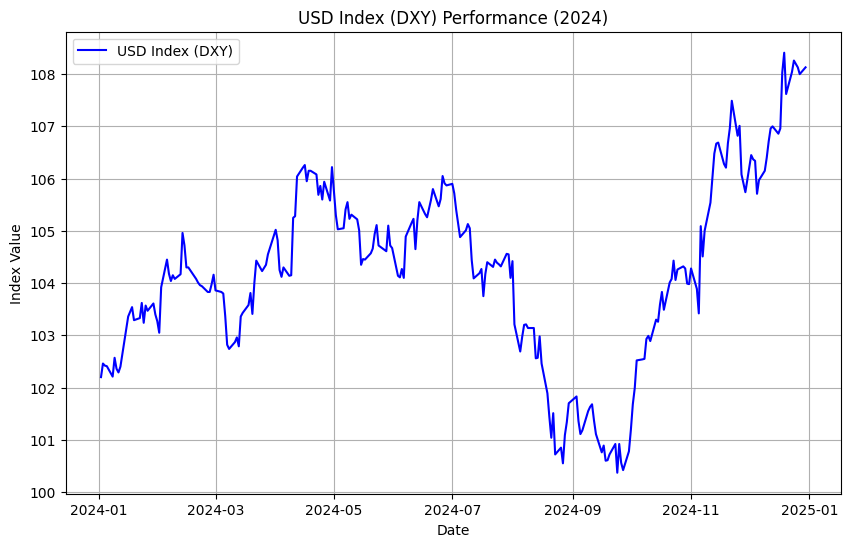

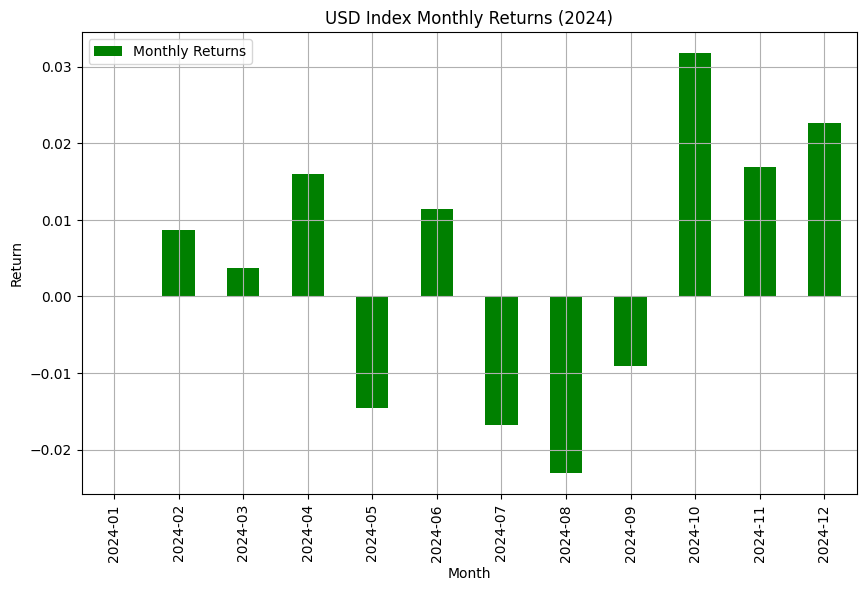

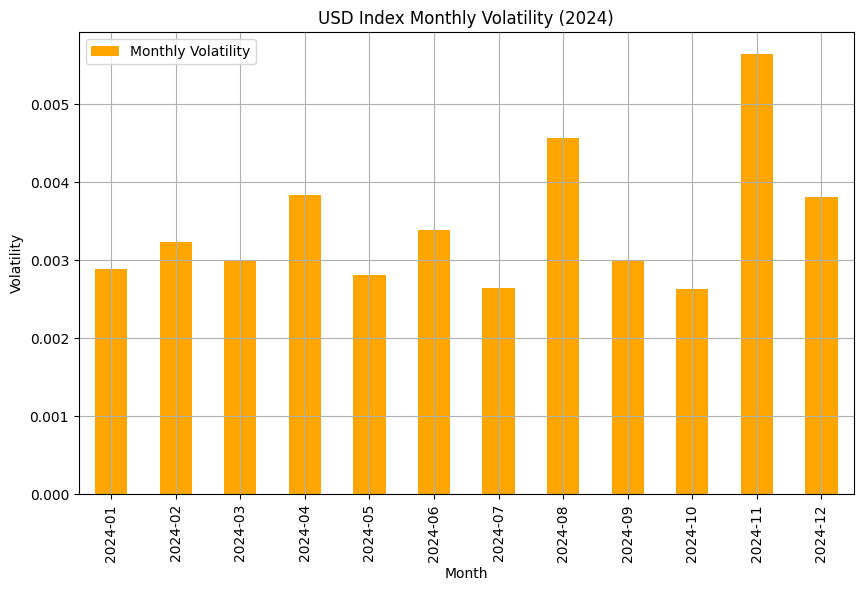

In [43]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetching data for USD Index (DXY)
try:
    dxy_data = yf.download("DX-Y.NYB", start="2024-01-01", end="2024-12-31", interval="1d")
    
    # Check if data is available
    if dxy_data.empty:
        print("No data available for USD Index. Please check the ticker or source.")
    else:
        print("Data successfully retrieved for USD Index (DXY):")
        print(dxy_data.head())  # Show the first few rows

        # Flatten the columns if MultiIndex is present
        if isinstance(dxy_data.columns, pd.MultiIndex):
            dxy_data.columns = [col[0] for col in dxy_data.columns]  # Use first level only

        # Calculate daily returns
        dxy_data['Daily Return'] = dxy_data['Close'].pct_change()

        # Resample to monthly data and calculate returns and volatility
        monthly_returns = dxy_data['Close'].resample('ME').ffill().pct_change()
        monthly_volatility = dxy_data['Daily Return'].resample('ME').std()

        # Calculate annual return and volatility
        annual_return = dxy_data['Close'].iloc[-1] / dxy_data['Close'].iloc[0] - 1
        annual_volatility = dxy_data['Daily Return'].std() * (252**0.5)  # 252 trading days

        # Print results
        print("\nMonthly Returns:")
        print(monthly_returns)
        print("\nMonthly Volatility:")
        print(monthly_volatility)
        print(f"\nAnnual Return: {annual_return:.2%}")
        print(f"Annual Volatility: {annual_volatility:.2%}")

        # Plot adjusted closing prices
        plt.figure(figsize=(10, 6))
        plt.plot(dxy_data.index, dxy_data['Close'], label="USD Index (DXY)", color="blue")
        plt.title("USD Index (DXY) Performance (2024)")
        plt.xlabel("Date")
        plt.ylabel("Index Value")
        plt.legend()
        plt.grid()
        plt.show()

        # Format the index to display only the month and year
        monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
        monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')

        # Plot monthly returns
        plt.figure(figsize=(10, 6))
        monthly_returns.plot(kind='bar', color="green", label="Monthly Returns")
        plt.title("USD Index Monthly Returns (2024)")
        plt.xlabel("Month")
        plt.ylabel("Return")
        plt.legend()
        plt.grid()
        plt.show()

        # Plot monthly volatility
        plt.figure(figsize=(10, 6))
        monthly_volatility.plot(kind='bar', color="orange", label="Monthly Volatility")
        plt.title("USD Index Monthly Volatility (2024)")
        plt.xlabel("Month")
        plt.ylabel("Volatility")
        plt.legend()
        plt.grid()
        plt.show()

except Exception as e:
    print(f"Error retrieving USD Index data: {e}")

[*********************100%***********************]  1 of 1 completed

Data successfully retrieved for CHF (USD/CHF):
Price          Close     High       Low      Open Volume
Ticker         CHF=X    CHF=X     CHF=X     CHF=X  CHF=X
Date                                                    
2024-01-01  0.840759  0.84190  0.840759  0.840759      0
2024-01-02  0.841890  0.85016  0.841690  0.841890      0
2024-01-03  0.850120  0.85540  0.848700  0.850120      0
2024-01-04  0.848900  0.85285  0.847710  0.848900      0
2024-01-05  0.850000  0.85688  0.845600  0.850000      0

Monthly Returns:
Date
2024-01-31         NaN
2024-02-29    0.019551
2024-03-31    0.025446
2024-04-30    0.010709
2024-05-31   -0.008136
2024-06-30   -0.005303
2024-07-31   -0.018352
2024-08-31   -0.039783
2024-09-30   -0.007604
2024-10-31    0.030696
2024-11-30    0.018516
2024-12-31    0.022100
Freq: ME, Name: Close, dtype: float64

Monthly Volatility:
Date
2024-01-31    0.003806
2024-02-29    0.004598
2024-03-31    0.004340
2024-04-30    0.003536
2024-05-31    0.004324
2024-06-30    0.003

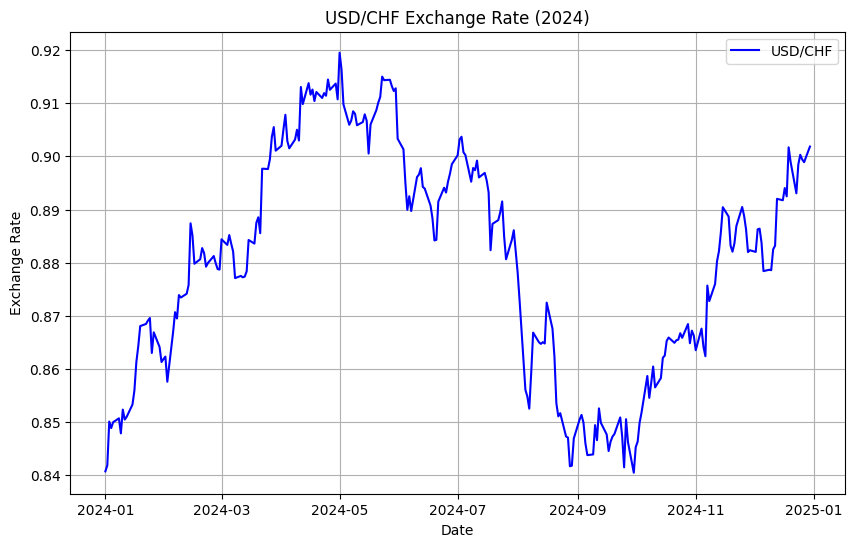

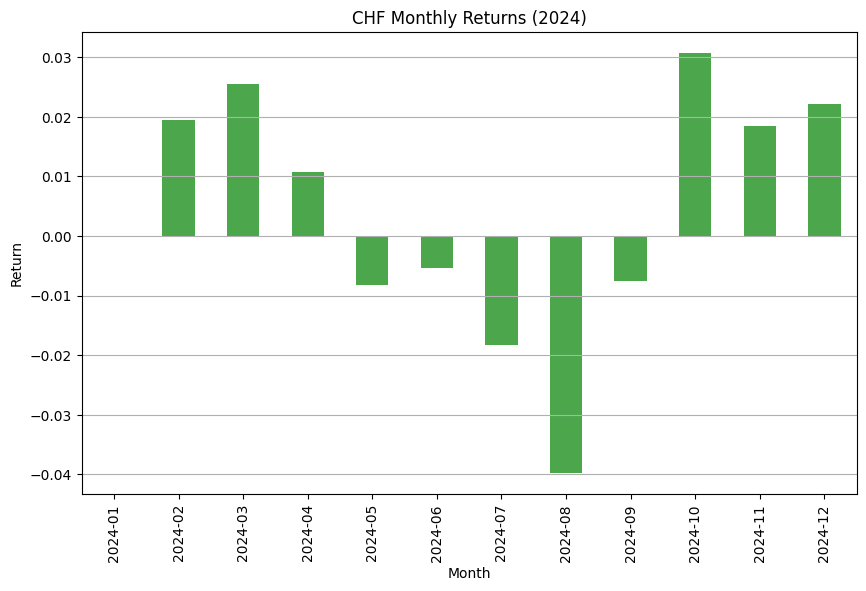

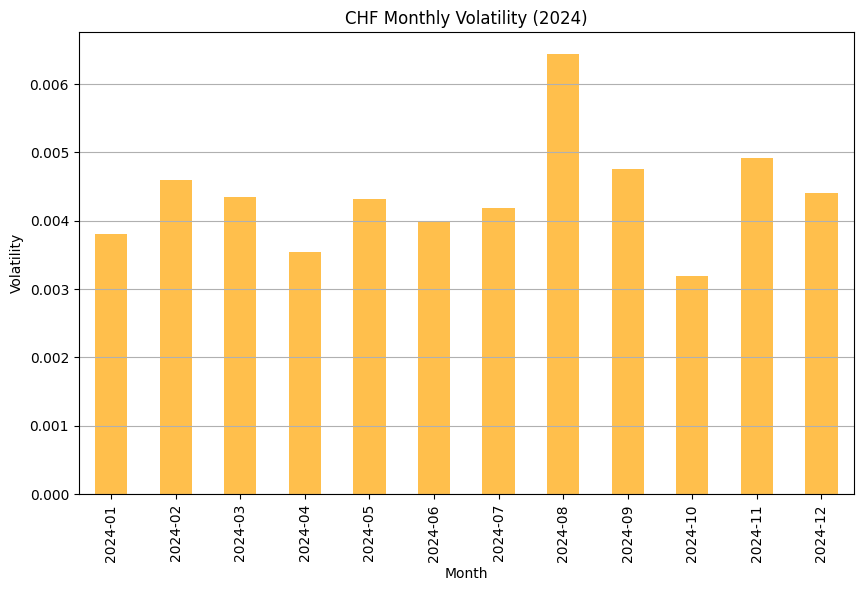

In [42]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetching data for CHF (USD/CHF)
try:
    chf_data = yf.download("CHF=X", start="2024-01-01", end="2024-12-31", interval="1d")
    
    # Check if data is available
    if chf_data.empty:
        print("No data available for CHF. Please check the ticker or source.")
    else:
        print("Data successfully retrieved for CHF (USD/CHF):")
        print(chf_data.head())  # Show the first few rows

        # Flatten the columns if MultiIndex is present
        if isinstance(chf_data.columns, pd.MultiIndex):
            chf_data.columns = [col[0] for col in chf_data.columns]

        # Calculate daily returns
        chf_data['Daily Return'] = chf_data['Close'].pct_change()

        # Resample to monthly data and calculate returns and volatility
        monthly_returns = chf_data['Close'].resample('ME').ffill().pct_change()
        monthly_volatility = chf_data['Daily Return'].resample('ME').std()

        # Calculate annual return and volatility
        annual_return = chf_data['Close'].iloc[-1] / chf_data['Close'].iloc[0] - 1
        annual_volatility = chf_data['Daily Return'].std() * (252**0.5)

        # Print results
        print("\nMonthly Returns:")
        print(monthly_returns)
        print("\nMonthly Volatility:")
        print(monthly_volatility)
        print(f"\nAnnual Return: {annual_return * 100:.2f}%")
        print(f"Annual Volatility: {annual_volatility * 100:.2f}%")

        # Plot adjusted closing prices
        plt.figure(figsize=(10, 6))
        plt.plot(chf_data.index, chf_data['Close'], label="USD/CHF", color="blue")
        plt.title("USD/CHF Exchange Rate (2024)")
        plt.xlabel("Date")
        plt.ylabel("Exchange Rate")
        plt.legend()
        plt.grid()
        plt.show()

        # Format the index to display only the month and year
        monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
        monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')

        # Plot monthly returns
        plt.figure(figsize=(10, 6))
        monthly_returns.plot(kind='bar', color="green", alpha=0.7)
        plt.title("CHF Monthly Returns (2024)")
        plt.xlabel("Month")
        plt.ylabel("Return")
        plt.grid(axis='y')
        plt.show()

        # Plot monthly volatility
        plt.figure(figsize=(10, 6))
        monthly_volatility.plot(kind='bar', color="orange", alpha=0.7)
        plt.title("CHF Monthly Volatility (2024)")
        plt.xlabel("Month")
        plt.ylabel("Volatility")
        plt.grid(axis='y')
        plt.show()

except Exception as e:
    print(f"Error retrieving CHF data: {e}")


[*********************100%***********************]  1 of 1 completed

Data successfully retrieved for JPY:
Price            Close        High         Low        Open Volume
Ticker           JPY=X       JPY=X       JPY=X       JPY=X  JPY=X
Date                                                             
2024-01-01  140.951996  141.024994  140.951996  140.951996      0
2024-01-02  141.126007  142.186005  141.106995  141.126007      0
2024-01-03  142.154999  143.692993  141.869003  142.154999      0
2024-01-04  142.998993  144.832001  142.867996  142.998993      0
2024-01-05  144.764999  145.957993  143.848007  144.764999      0

Monthly Returns:
Date
2024-01         NaN
2024-02    0.022305
2024-03    0.005204
2024-04    0.032184
2024-05    0.004088
2024-06    0.023791
2024-07   -0.049892
2024-08   -0.050960
2024-09   -0.014542
2024-10    0.072985
2024-11   -0.013250
2024-12    0.044313
Name: Close, dtype: float64

Monthly Volatility:
Date
2024-01    0.004747
2024-02    0.004501
2024-03    0.004908
2024-04    0.005041
2024-05    0.006494
2024-06    0.00377

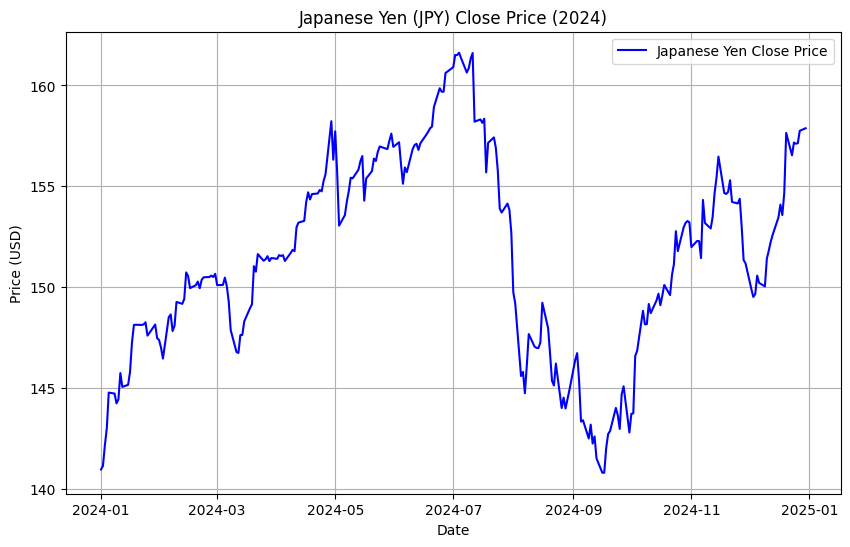

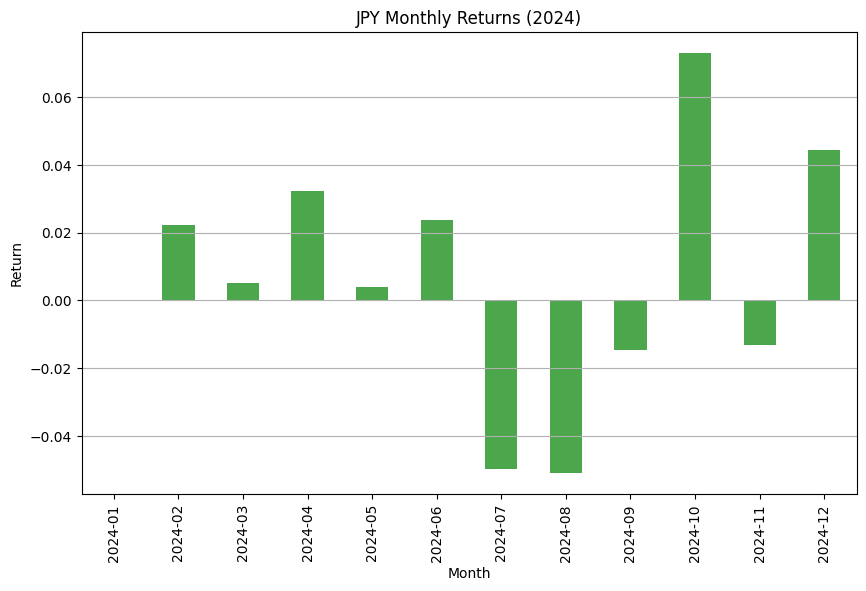

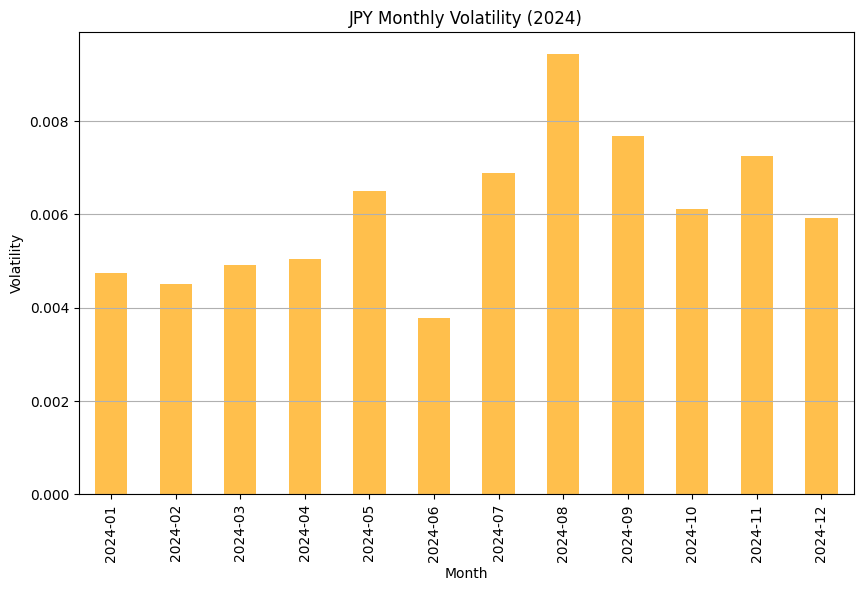

In [46]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetching data for Japanese Yen (JPY=X)
try:
    jpy_data = yf.download("JPY=X", start="2024-01-01", end="2024-12-31", interval="1d")
    
    # Check if data is available
    if jpy_data.empty:
        print("No data available for Japanese Yen. Please check the ticker or source.")
    else:
        print("Data successfully retrieved for JPY:")
        print(jpy_data.head())  # Show the first few rows

        # Flatten the columns if MultiIndex is present
        if isinstance(jpy_data.columns, pd.MultiIndex):
            jpy_data.columns = [col[0] for col in jpy_data.columns]  # Use first level only

        # Calculate daily returns
        jpy_data['Daily Return'] = jpy_data['Close'].pct_change()

        # Resample to monthly data and calculate returns and volatility
        monthly_returns = jpy_data['Close'].resample('ME').ffill().pct_change()
        monthly_volatility = jpy_data['Daily Return'].resample('ME').std()

        # Calculate annual return and volatility
        annual_return = jpy_data['Close'].iloc[-1] / jpy_data['Close'].iloc[0] - 1
        annual_volatility = jpy_data['Daily Return'].std() * (252**0.5)  # 252 trading days

        # Format indices for cleaner visuals
        monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
        monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')

        # Print results
        print("\nMonthly Returns:")
        print(monthly_returns)
        print("\nMonthly Volatility:")
        print(monthly_volatility)
        print(f"\nAnnual Return: {annual_return:.2%}")
        print(f"Annual Volatility: {annual_volatility:.2%}")

        # Plot adjusted closing prices
        plt.figure(figsize=(10, 6))
        plt.plot(jpy_data.index, jpy_data['Close'], label="Japanese Yen Close Price", color="blue")
        plt.title("Japanese Yen (JPY) Close Price (2024)")
        plt.xlabel("Date")
        plt.ylabel("Price (USD)")
        plt.legend()
        plt.grid()
        plt.show()

        # Plot monthly returns
        plt.figure(figsize=(10, 6))
        monthly_returns.plot(kind='bar', color="green", alpha=0.7)
        plt.title("JPY Monthly Returns (2024)")
        plt.xlabel("Month")
        plt.ylabel("Return")
        plt.grid(axis='y')
        plt.show()

        # Plot monthly volatility
        plt.figure(figsize=(10, 6))
        monthly_volatility.plot(kind='bar', color="orange", alpha=0.7)
        plt.title("JPY Monthly Volatility (2024)")
        plt.xlabel("Month")
        plt.ylabel("Volatility")
        plt.grid(axis='y')
        plt.show()

except Exception as e:
    print(f"Error retrieving JPY data: {e}")

[*********************100%***********************]  1 of 1 completed

Data successfully retrieved for US Treasury Yield:
Price       Close   High    Low   Open Volume
Ticker       ^TNX   ^TNX   ^TNX   ^TNX   ^TNX
Date                                         
2024-01-02  3.946  3.973  3.918  3.969      0
2024-01-03  3.907  4.008  3.894  3.978      0
2024-01-04  3.991  4.006  3.971  3.974      0
2024-01-05  4.042  4.099  3.953  4.038      0
2024-01-08  4.002  4.063  3.966  4.059      0

Monthly Returns:
Date
2024-01         NaN
2024-02    0.071843
2024-03   -0.010818
2024-04    0.114123
2024-05   -0.036705
2024-06   -0.037882
2024-07   -0.053880
2024-08   -0.048187
2024-09   -0.027870
2024-10    0.126775
2024-11   -0.024743
2024-12    0.087841
Name: Close, dtype: float64

Monthly Volatility:
Date
2024-01    0.013564
2024-02    0.017976
2024-03    0.010850
2024-04    0.016018
2024-05    0.011104
2024-06    0.015463
2024-07    0.012474
2024-08    0.018143
2024-09    0.010403
2024-10    0.012240
2024-11    0.015511
2024-12    0.010842
Name: Daily Return, dtyp

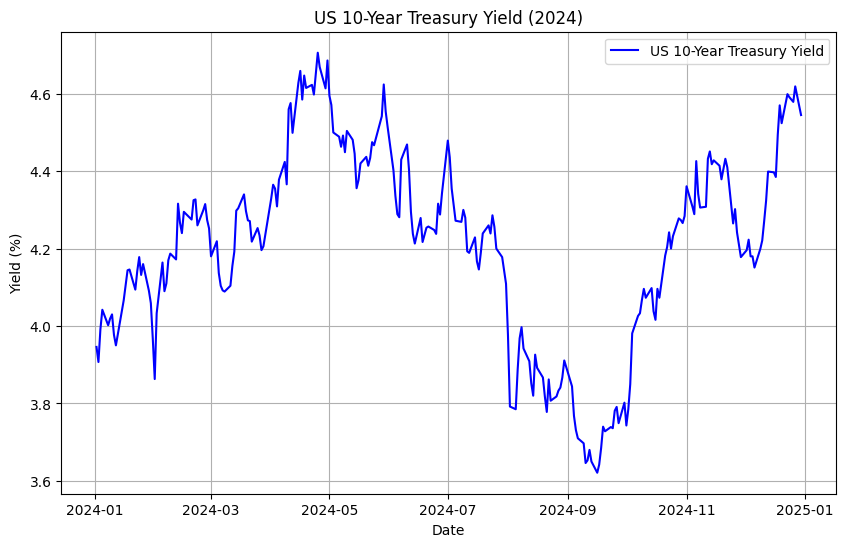

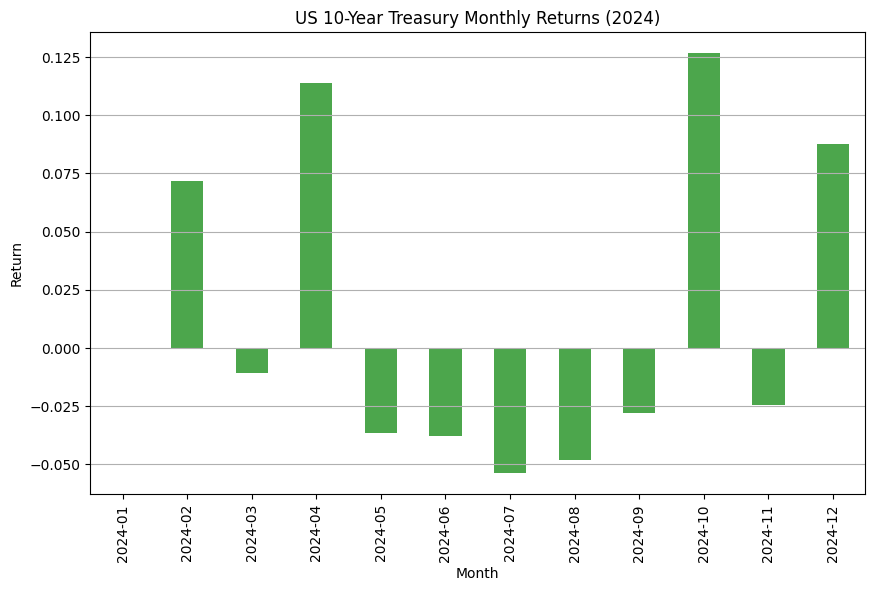

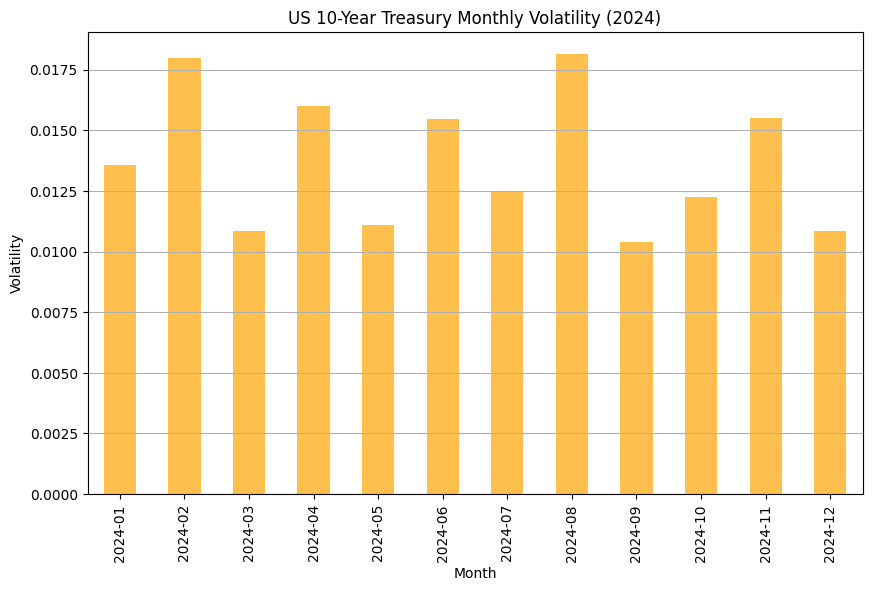

In [48]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetching data for US 10-Year Treasury Yield (TNX)
try:
    treasury_data = yf.download("^TNX", start="2024-01-01", end="2024-12-31", interval="1d")
    
    # Check if data is available
    if treasury_data.empty:
        print("No data available for US Treasury Yield. Please check the ticker or source.")
    else:
        print("Data successfully retrieved for US Treasury Yield:")
        print(treasury_data.head())  # Show the first few rows

        # Flatten the columns if MultiIndex is present
        if isinstance(treasury_data.columns, pd.MultiIndex):
            treasury_data.columns = [col[0] for col in treasury_data.columns]  # Use first level only

        # Calculate daily returns
        treasury_data['Daily Return'] = treasury_data['Close'].pct_change()

        # Resample to monthly data and calculate returns and volatility
        monthly_returns = treasury_data['Close'].resample('ME').ffill().pct_change()
        monthly_volatility = treasury_data['Daily Return'].resample('ME').std()

        # Calculate annual return and volatility
        annual_return = treasury_data['Close'].iloc[-1] / treasury_data['Close'].iloc[0] - 1
        annual_volatility = treasury_data['Daily Return'].std() * (252**0.5)  # 252 trading days

        # Format indices for cleaner visuals
        monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
        monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')

        # Print results
        print("\nMonthly Returns:")
        print(monthly_returns)
        print("\nMonthly Volatility:")
        print(monthly_volatility)
        print(f"\nAnnual Return: {annual_return:.2%}")
        print(f"Annual Volatility: {annual_volatility:.2%}")

        # Plot adjusted closing prices
        plt.figure(figsize=(10, 6))
        plt.plot(treasury_data.index, treasury_data['Close'], label="US 10-Year Treasury Yield", color="blue")
        plt.title("US 10-Year Treasury Yield (2024)")
        plt.xlabel("Date")
        plt.ylabel("Yield (%)")
        plt.legend()
        plt.grid()
        plt.show()

        # Plot monthly returns
        plt.figure(figsize=(10, 6))
        monthly_returns.plot(kind='bar', color="green", alpha=0.7)
        plt.title("US 10-Year Treasury Monthly Returns (2024)")
        plt.xlabel("Month")
        plt.ylabel("Return")
        plt.grid(axis='y')
        plt.show()

        # Plot monthly volatility
        plt.figure(figsize=(10, 6))
        monthly_volatility.plot(kind='bar', color="orange", alpha=0.7)
        plt.title("US 10-Year Treasury Monthly Volatility (2024)")
        plt.xlabel("Month")
        plt.ylabel("Volatility")
        plt.grid(axis='y')
        plt.show()

except Exception as e:
    print(f"Error retrieving US Treasury Yield data: {e}")

[*********************100%***********************]  1 of 1 completed

Data successfully retrieved for Brent Crude Oil Futures:
Price           Close       High        Low       Open Volume
Ticker           BZ=F       BZ=F       BZ=F       BZ=F   BZ=F
Date                                                         
2024-01-02  75.889999  79.040001  75.599998  77.209999  28591
2024-01-03  78.250000  78.669998  74.790001  75.989998  32172
2024-01-04  77.589996  79.400002  76.500000  78.500000  33154
2024-01-05  78.760002  79.250000  77.500000  77.599998  30994
2024-01-08  76.120003  78.949997  75.260002  78.599998  32539

Monthly Returns:
Date
2024-01-31         NaN
2024-02-29    0.023375
2024-03-31    0.046161
2024-04-30    0.004344
2024-05-31   -0.071022
2024-06-30    0.058687
2024-07-31   -0.065849
2024-08-31   -0.023786
2024-09-30   -0.089213
2024-10-31    0.019368
2024-11-30   -0.003007
2024-12-31    0.019879
Freq: ME, Name: Close, dtype: float64

Monthly Volatility:
Date
2024-01-31    0.016258
2024-02-29    0.015578
2024-03-31    0.011321
2024-04-30    0

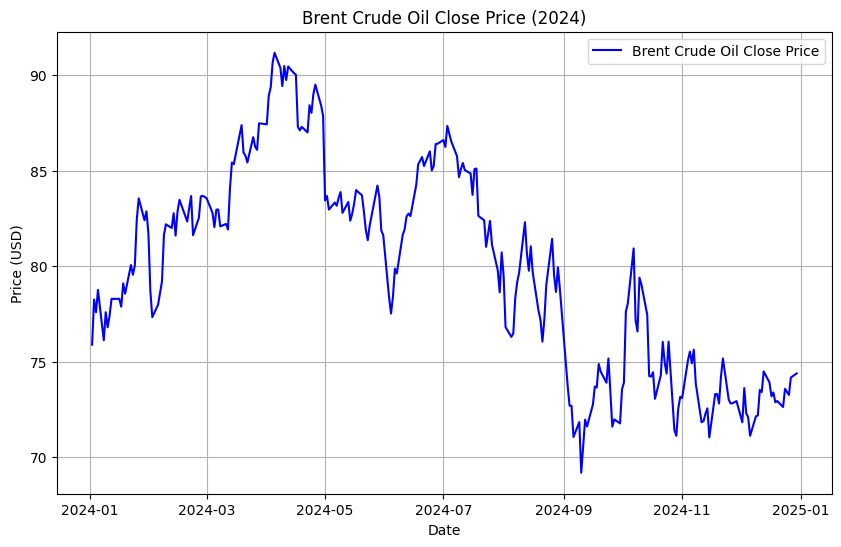

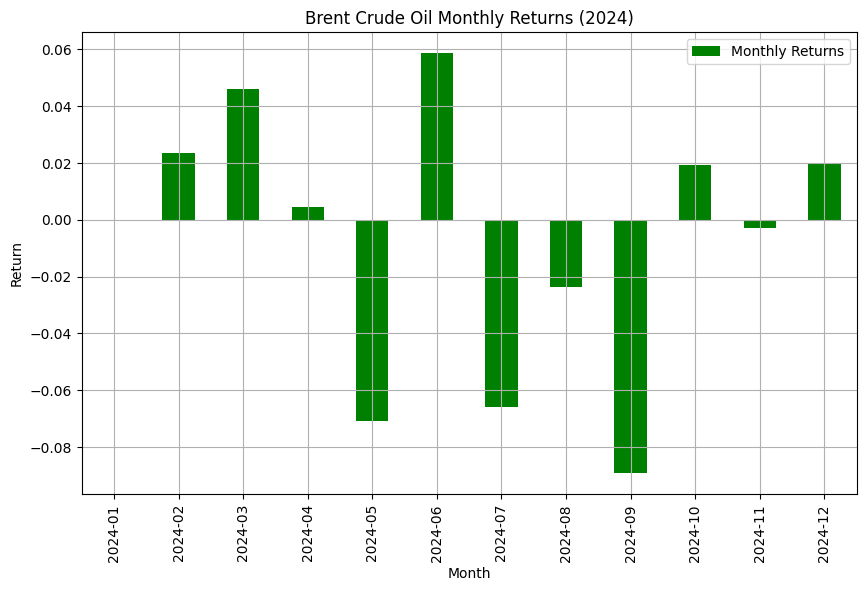

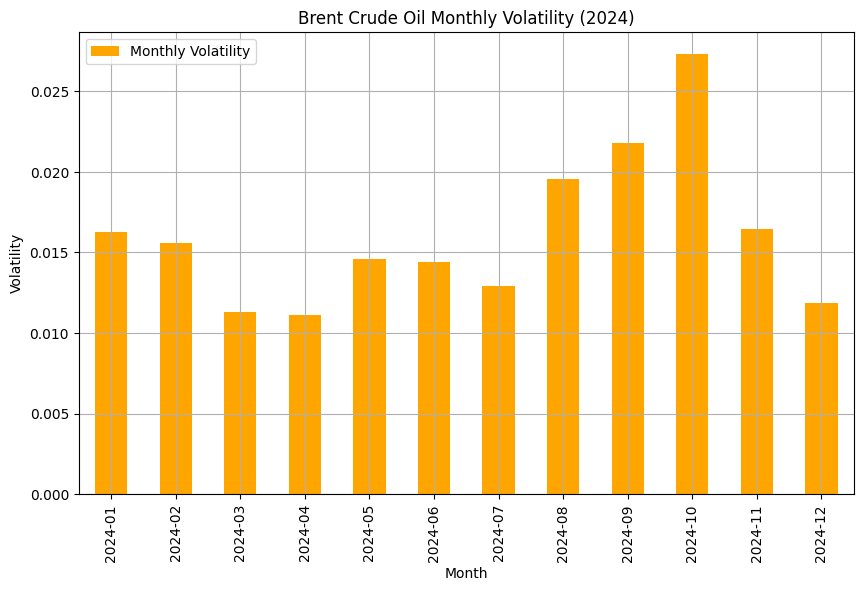

In [53]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetching data for Brent Crude Oil Futures (BZ=F)
try:
    brent_data = yf.download("BZ=F", start="2024-01-01", end="2024-12-31", interval="1d")

    # Check if data is available
    if brent_data.empty:
        print("No data available for Brent Crude Oil Futures. Please check the ticker or source.")
    else:
        print("Data successfully retrieved for Brent Crude Oil Futures:")
        print(brent_data.head())  # Show the first few rows

        # Flatten the columns if MultiIndex is present
        if isinstance(brent_data.columns, pd.MultiIndex):
            brent_data.columns = [col[0] for col in brent_data.columns]  # Use first level only

        # Calculate daily returns
        brent_data['Daily Return'] = brent_data['Close'].pct_change()

        # Resample to monthly data and calculate returns and volatility
        monthly_returns = brent_data['Close'].resample('ME').ffill().pct_change()
        monthly_volatility = brent_data['Daily Return'].resample('ME').std()

        # Calculate annual return and volatility
        annual_return = brent_data['Close'].iloc[-1] / brent_data['Close'].iloc[0] - 1
        annual_volatility = brent_data['Daily Return'].std() * (252**0.5)  # 252 trading days

        # Print results
        print("\nMonthly Returns:")
        print(monthly_returns)
        print("\nMonthly Volatility:")
        print(monthly_volatility)
        print(f"\nAnnual Return: {annual_return:.2%}")
        print(f"Annual Volatility: {annual_volatility:.2%}")

        # Plot adjusted closing prices
        plt.figure(figsize=(10, 6))
        plt.plot(brent_data.index, brent_data['Close'], label="Brent Crude Oil Close Price", color="blue")
        plt.title("Brent Crude Oil Close Price (2024)")
        plt.xlabel("Date")
        plt.ylabel("Price (USD)")
        plt.legend()
        plt.grid()
        plt.show()
        
        # Format indices for cleaner visuals
        monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
        monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')
        
        # Plot monthly returns
        plt.figure(figsize=(10, 6))
        monthly_returns.plot(kind='bar', color="green", label="Monthly Returns")
        plt.title("Brent Crude Oil Monthly Returns (2024)")
        plt.xlabel("Month")
        plt.ylabel("Return")
        plt.legend()
        plt.grid()
        plt.show()

        # Plot monthly volatility
        plt.figure(figsize=(10, 6))
        monthly_volatility.plot(kind='bar', color="orange", label="Monthly Volatility")
        plt.title("Brent Crude Oil Monthly Volatility (2024)")
        plt.xlabel("Month")
        plt.ylabel("Volatility")
        plt.legend()
        plt.grid()
        plt.show()

except Exception as e:
    print(f"Error retrieving Brent Crude Oil Futures data: {e}")

[*********************100%***********************]  1 of 1 completed

Data successfully retrieved for Gold Futures:
Price             Close         High          Low         Open Volume
Ticker             GC=F         GC=F         GC=F         GC=F   GC=F
Date                                                                 
2024-01-02  2064.399902  2073.699951  2057.100098  2063.500000     61
2024-01-03  2034.199951  2044.000000  2034.199951  2034.199951     54
2024-01-04  2042.300049  2044.500000  2038.000000  2041.599976     88
2024-01-05  2042.400024  2048.100098  2042.400024  2044.500000     12
2024-01-08  2026.599976  2033.699951  2019.099976  2019.099976     10

Monthly Returns:
Date
2024-01-31         NaN
2024-02-29   -0.001318
2024-03-31    0.083932
2024-04-30    0.033372
2024-05-31    0.013747
2024-06-30    0.002066
2024-07-31    0.042445
2024-08-31    0.027735
2024-09-30    0.057062
2024-10-31    0.038769
2024-11-30   -0.029690
2024-12-31   -0.019157
Freq: ME, Name: Close, dtype: float64

Monthly Volatility:
Date
2024-01-31    0.007312
2024-02-

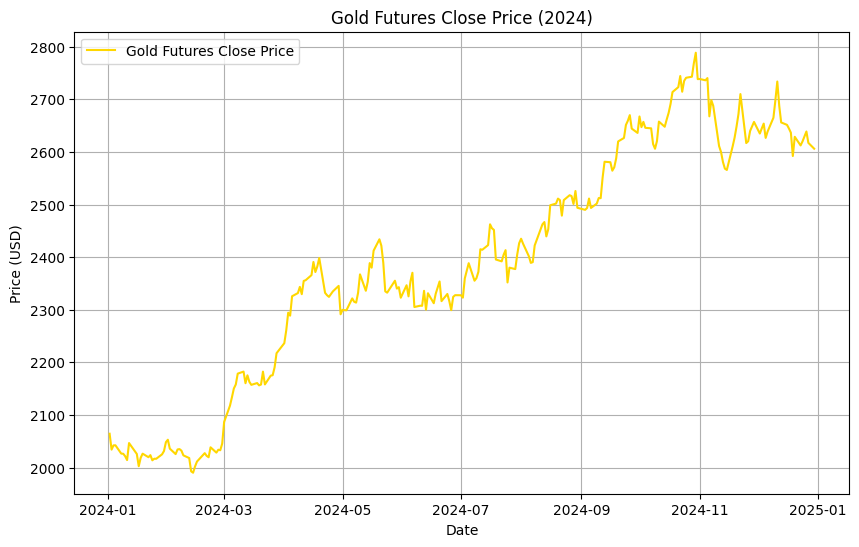

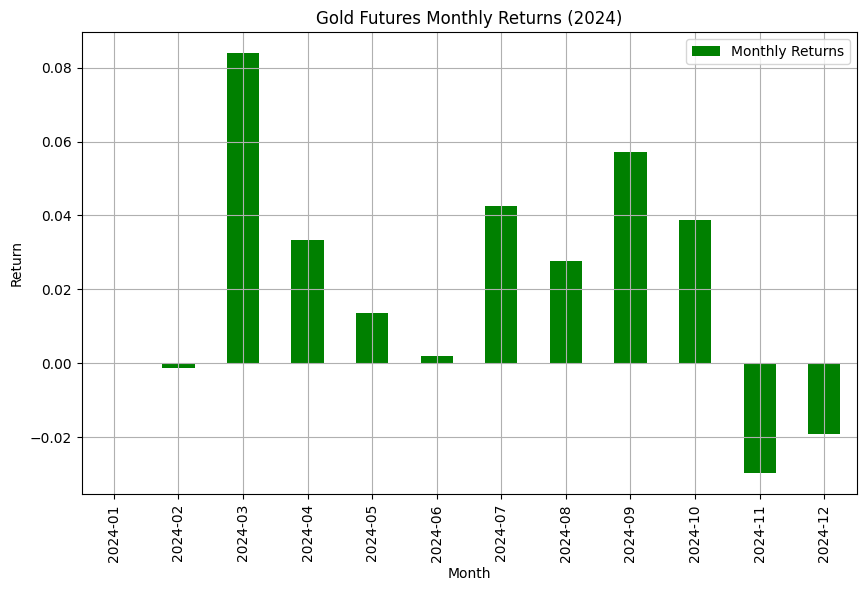

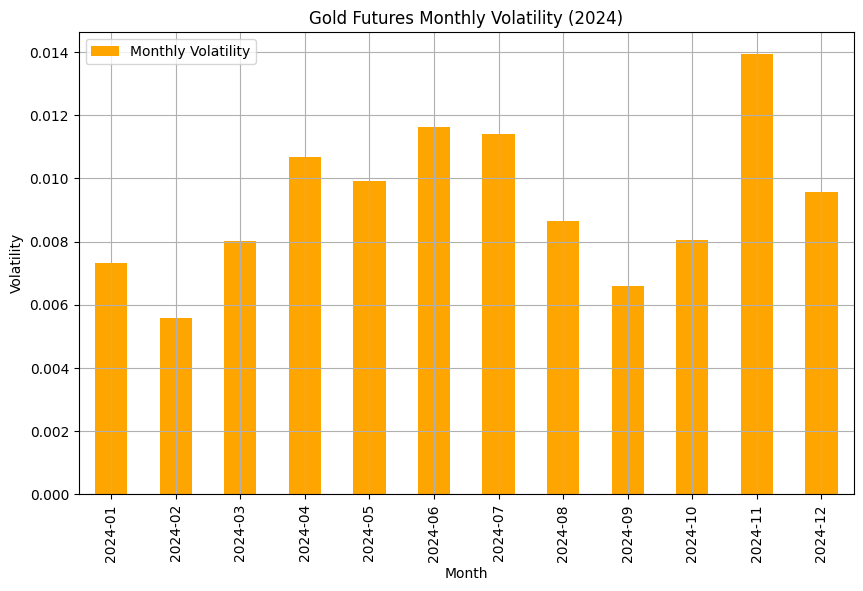

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetching data for Gold Futures (GC=F)
try:
    gold_data = yf.download("GC=F", start="2024-01-01", end="2024-12-31", interval="1d")
    
    # Check if data is available
    if gold_data.empty:
        print("No data available for Gold Futures. Please check the ticker or source.")
    else:
        print("Data successfully retrieved for Gold Futures:")
        print(gold_data.head())  # Show the first few rows

        # Flatten the columns if MultiIndex is present
        if isinstance(gold_data.columns, pd.MultiIndex):
            gold_data.columns = [col[0] for col in gold_data.columns]  # Use first level only

        # Calculate daily returns
        gold_data['Daily Return'] = gold_data['Close'].pct_change()

        # Resample to monthly data and calculate returns and volatility
        monthly_returns = gold_data['Close'].resample('ME').ffill().pct_change()
        monthly_volatility = gold_data['Daily Return'].resample('ME').std()

        # Calculate annual return and volatility
        annual_return = gold_data['Close'].iloc[-1] / gold_data['Close'].iloc[0] - 1
        annual_volatility = gold_data['Daily Return'].std() * (252**0.5)  # 252 trading days

        # Print results
        print("\nMonthly Returns:")
        print(monthly_returns)
        print("\nMonthly Volatility:")
        print(monthly_volatility)
        print(f"\nAnnual Return: {annual_return:.2%}")
        print(f"Annual Volatility: {annual_volatility:.2%}")

        # Plot adjusted closing prices
        plt.figure(figsize=(10, 6))
        plt.plot(gold_data.index, gold_data['Close'], label="Gold Futures Close Price", color="gold")
        plt.title("Gold Futures Close Price (2024)")
        plt.xlabel("Date")
        plt.ylabel("Price (USD)")
        plt.legend()
        plt.grid()
        plt.show()
        
        # Format indices for cleaner visuals
        monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
        monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')
        
        # Plot monthly returns
        plt.figure(figsize=(10, 6))
        monthly_returns.plot(kind='bar', color="green", label="Monthly Returns")
        plt.title("Gold Futures Monthly Returns (2024)")
        plt.xlabel("Month")
        plt.ylabel("Return")
        plt.legend()
        plt.grid()
        plt.show()

        # Plot monthly volatility
        plt.figure(figsize=(10, 6))
        monthly_volatility.plot(kind='bar', color="orange", label="Monthly Volatility")
        plt.title("Gold Futures Monthly Volatility (2024)")
        plt.xlabel("Month")
        plt.ylabel("Volatility")
        plt.legend()
        plt.grid()
        plt.show()

except Exception as e:
    print(f"Error retrieving Gold Futures data: {e}")

[*********************100%***********************]  1 of 1 completed

Data successfully retrieved for Currency Futures:
Price          Close      High       Low      Open   Volume
Ticker      EURUSD=X  EURUSD=X  EURUSD=X  EURUSD=X EURUSD=X
Date                                                       
2024-01-01  1.105583  1.105339  1.103997  1.105583        0
2024-01-02  1.103875  1.104606  1.094200  1.103875        0
2024-01-03  1.094176  1.096700  1.089871  1.094176        0
2024-01-04  1.092777  1.097021  1.091703  1.092777        0
2024-01-05  1.094739  1.099638  1.087985  1.094739        0

Monthly Returns:
Date
2024-01         NaN
2024-02   -0.000423
2024-03   -0.004091
2024-04   -0.007297
2024-05    0.011171
2024-06   -0.011715
2024-07    0.010048
2024-08    0.024443
2024-09    0.008065
2024-10   -0.027810
2024-11   -0.027274
2024-12   -0.012651
Name: Close, dtype: float64

Monthly Volatility:
Date
2024-01    0.002755
2024-02    0.003444
2024-03    0.003506
2024-04    0.003928
2024-05    0.002885
2024-06    0.004140
2024-07    0.002108
2024-08    0.

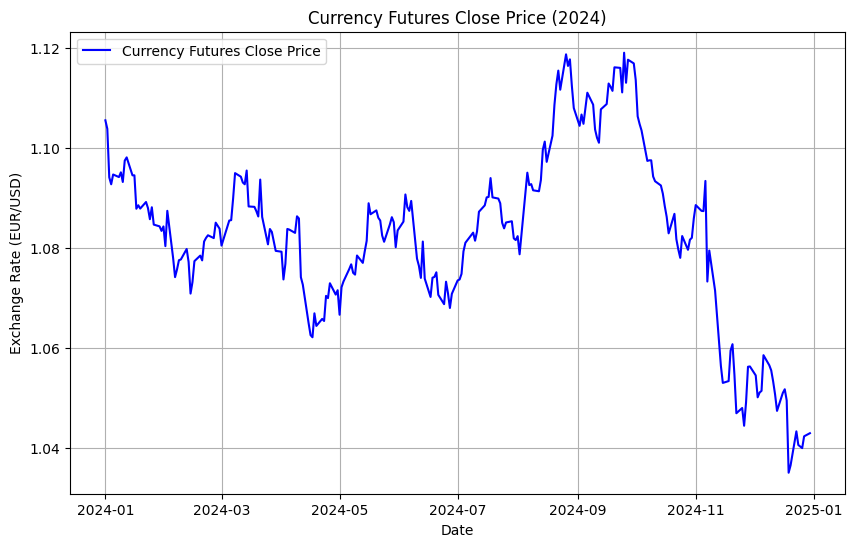

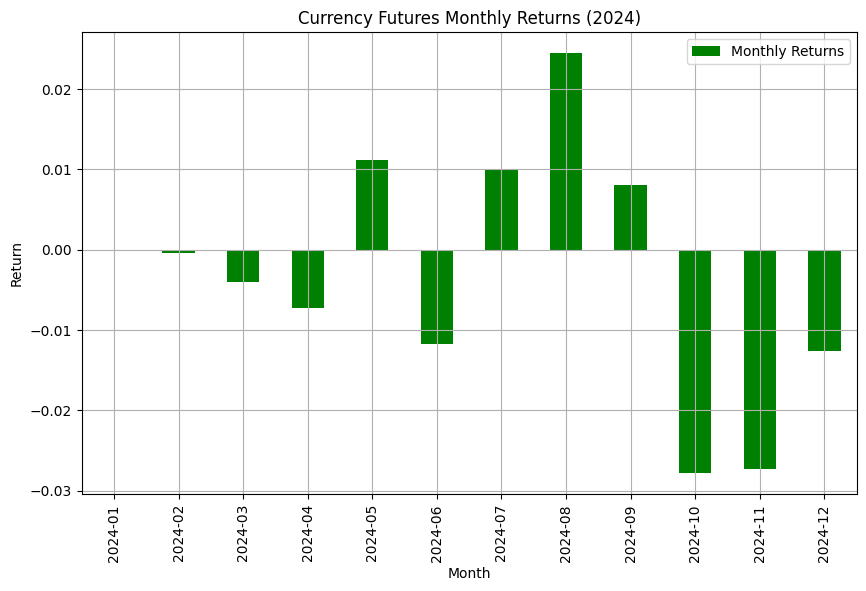

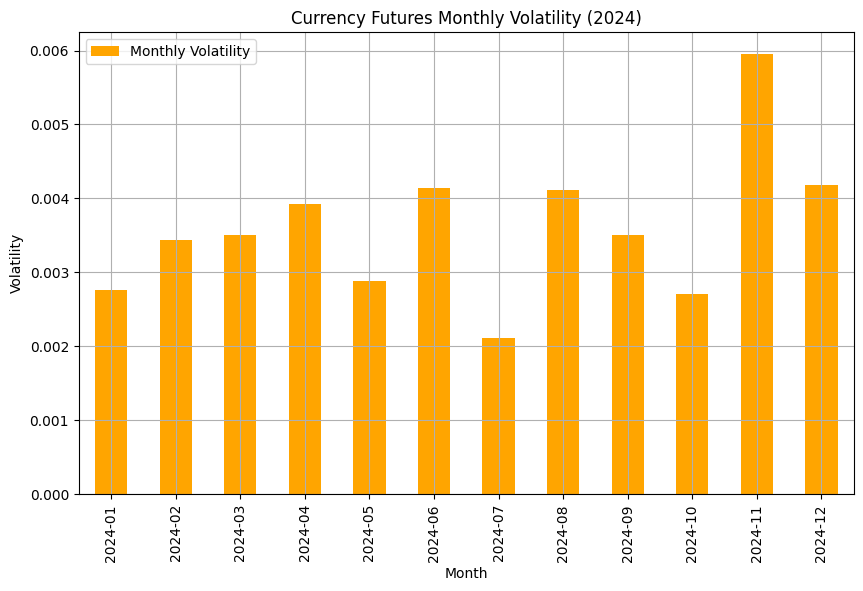

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetching data for Currency Futures (EUR/USD, Ticker: "EURUSD=X")
try:
    currency_data = yf.download("EURUSD=X", start="2024-01-01", end="2024-12-31", interval="1d")
    
    # Check if data is available
    if currency_data.empty:
        print("No data available for Currency Futures. Please check the ticker or source.")
    else:
        print("Data successfully retrieved for Currency Futures:")
        print(currency_data.head())  # Show the first few rows

        # Flatten the columns if MultiIndex is present
        if isinstance(currency_data.columns, pd.MultiIndex):
            currency_data.columns = [col[0] for col in currency_data.columns]  # Use first level only

        # Calculate daily returns
        currency_data['Daily Return'] = currency_data['Close'].pct_change()

        # Resample to monthly data and calculate returns and volatility
        monthly_returns = currency_data['Close'].resample('ME').ffill().pct_change()
        monthly_volatility = currency_data['Daily Return'].resample('ME').std()

        # Format indices for cleaner visuals
        monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
        monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')

        # Calculate annual return and volatility
        annual_return = currency_data['Close'].iloc[-1] / currency_data['Close'].iloc[0] - 1
        annual_volatility = currency_data['Daily Return'].std() * (252**0.5)  # 252 trading days

        # Print results
        print("\nMonthly Returns:")
        print(monthly_returns)
        print("\nMonthly Volatility:")
        print(monthly_volatility)
        print(f"\nAnnual Return: {annual_return:.2%}")
        print(f"Annual Volatility: {annual_volatility:.2%}")

        # Plot adjusted closing prices
        plt.figure(figsize=(10, 6))
        plt.plot(currency_data.index, currency_data['Close'], label="Currency Futures Close Price", color="blue")
        plt.title("Currency Futures Close Price (2024)")
        plt.xlabel("Date")
        plt.ylabel("Exchange Rate (EUR/USD)")
        plt.legend()
        plt.grid()
        plt.show()

        # Plot monthly returns
        plt.figure(figsize=(10, 6))
        monthly_returns.plot(kind='bar', color="green", label="Monthly Returns")
        plt.title("Currency Futures Monthly Returns (2024)")
        plt.xlabel("Month")
        plt.ylabel("Return")
        plt.legend()
        plt.grid()
        plt.show()

        # Plot monthly volatility
        plt.figure(figsize=(10, 6))
        monthly_volatility.plot(kind='bar', color="orange", label="Monthly Volatility")
        plt.title("Currency Futures Monthly Volatility (2024)")
        plt.xlabel("Month")
        plt.ylabel("Volatility")
        plt.legend()
        plt.grid()
        plt.show()

except Exception as e:
    print(f"Error retrieving Currency Futures data: {e}")

[*********************100%***********************]  1 of 1 completed

Data successfully retrieved for VIX Futures:
Price       Close   High    Low   Open Volume
Ticker       ^VIX   ^VIX   ^VIX   ^VIX   ^VIX
Date                                         
2024-01-02  13.20  14.23  13.10  13.22      0
2024-01-03  14.04  14.22  13.33  13.35      0
2024-01-04  14.13  14.20  13.64  13.93      0
2024-01-05  13.35  14.58  13.29  14.24      0
2024-01-08  13.08  14.18  13.02  14.00      0

Monthly Returns:
Date
2024-01         NaN
2024-02   -0.066202
2024-03   -0.029104
2024-04    0.202921
2024-05   -0.174441
2024-06   -0.037152
2024-07    0.315113
2024-08   -0.083130
2024-09    0.115333
2024-10    0.384340
2024-11   -0.416667
2024-12    0.287935
Name: Close, dtype: float64

Monthly Volatility:
Date
2024-01    0.045472
2024-02    0.052873
2024-03    0.036135
2024-04    0.068365
2024-05    0.053586
2024-06    0.035536
2024-07    0.071243
2024-08    0.183044
2024-09    0.106478
2024-10    0.069131
2024-11    0.065886
2024-12    0.189521
Name: Daily Return, dtype: flo

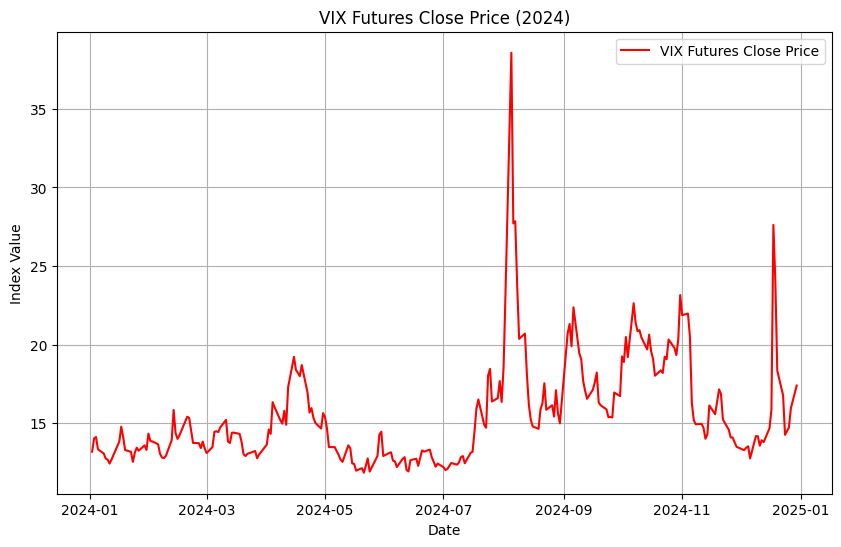

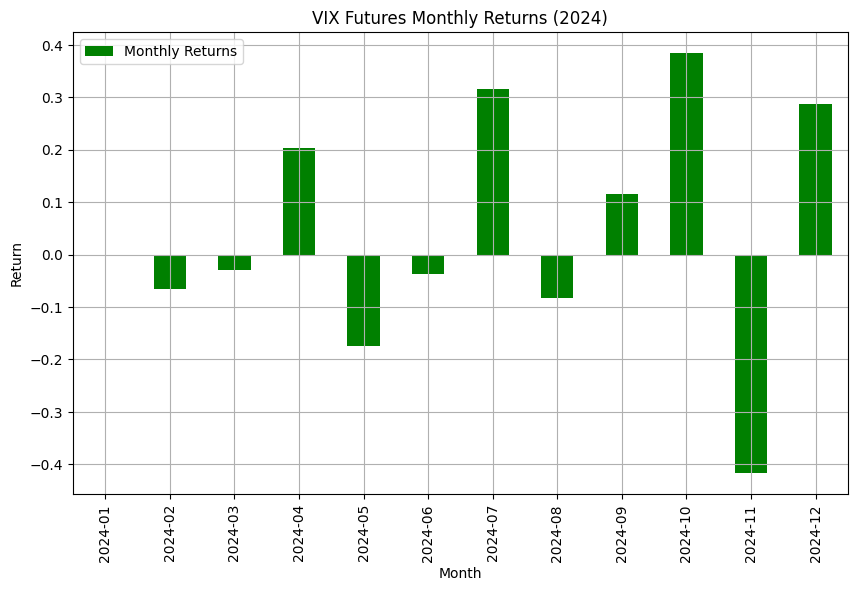

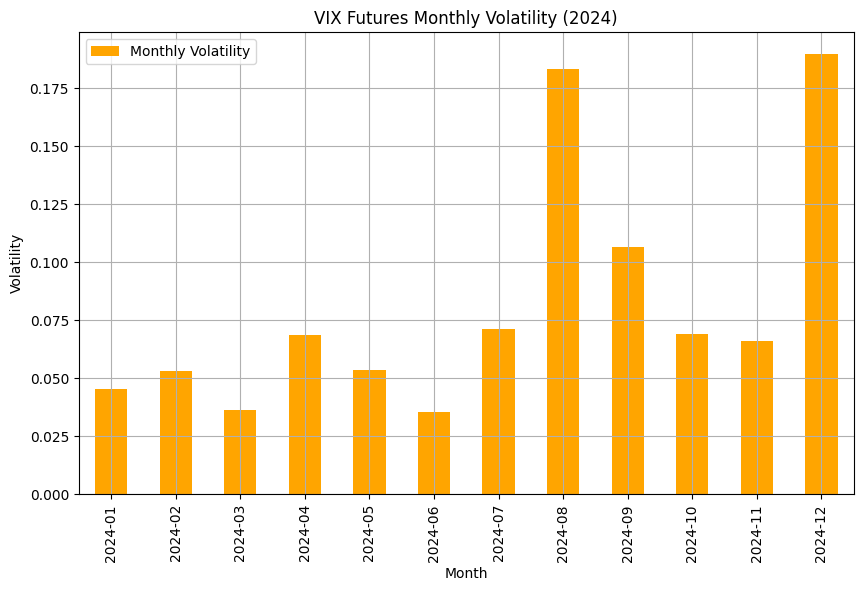

In [4]:
# Fetching data for VIX Futures (Ticker: "^VIX")
try:
    vix_data = yf.download("^VIX", start="2024-01-01", end="2024-12-31", interval="1d")
    
    # Check if data is available
    if vix_data.empty:
        print("No data available for VIX Futures. Please check the ticker or source.")
    else:
        print("Data successfully retrieved for VIX Futures:")
        print(vix_data.head())  # Show the first few rows

        # Flatten the columns if MultiIndex is present
        if isinstance(vix_data.columns, pd.MultiIndex):
            vix_data.columns = [col[0] for col in vix_data.columns]  # Use first level only

        # Calculate daily returns
        vix_data['Daily Return'] = vix_data['Close'].pct_change()

        # Resample to monthly data and calculate returns and volatility
        monthly_returns = vix_data['Close'].resample('ME').ffill().pct_change()
        monthly_volatility = vix_data['Daily Return'].resample('ME').std()

        # Format indices for cleaner visuals
        monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
        monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')

        # Calculate annual return and volatility
        annual_return = vix_data['Close'].iloc[-1] / vix_data['Close'].iloc[0] - 1
        annual_volatility = vix_data['Daily Return'].std() * (252**0.5)  # 252 trading days

        # Print results
        print("\nMonthly Returns:")
        print(monthly_returns)
        print("\nMonthly Volatility:")
        print(monthly_volatility)
        print(f"\nAnnual Return: {annual_return:.2%}")
        print(f"Annual Volatility: {annual_volatility:.2%}")

        # Plot adjusted closing prices
        plt.figure(figsize=(10, 6))
        plt.plot(vix_data.index, vix_data['Close'], label="VIX Futures Close Price", color="red")
        plt.title("VIX Futures Close Price (2024)")
        plt.xlabel("Date")
        plt.ylabel("Index Value")
        plt.legend()
        plt.grid()
        plt.show()

        # Plot monthly returns
        plt.figure(figsize=(10, 6))
        monthly_returns.plot(kind='bar', color="green", label="Monthly Returns")
        plt.title("VIX Futures Monthly Returns (2024)")
        plt.xlabel("Month")
        plt.ylabel("Return")
        plt.legend()
        plt.grid()
        plt.show()

        # Plot monthly volatility
        plt.figure(figsize=(10, 6))
        monthly_volatility.plot(kind='bar', color="orange", label="Monthly Volatility")
        plt.title("VIX Futures Monthly Volatility (2024)")
        plt.xlabel("Month")
        plt.ylabel("Volatility")
        plt.legend()
        plt.grid()
        plt.show()

except Exception as e:
    print(f"Error retrieving VIX Futures data: {e}")

In [6]:
pip install scipy


  Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl.metadata (60 kB)
Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl (30.3 MB)
Note: you may need to restart the kernel to use updated packages.



Optimized Portfolio Allocations:
               Asset        Type  Allocation (%)  Investment (USD)
0             Nvidia      Equity       23.943963      1.950420e+06
1             Thalès      Equity        5.000000      4.072885e+05
2             Coffee   Commodity       13.889409      1.131399e+06
3              Cocoa   Commodity       12.166628      9.910654e+05
4                JNJ      Equity        5.000000      4.072885e+05
5          USD Index    Currency        5.000000      4.072885e+05
6        Swiss Franc    Currency        5.000000      4.072885e+05
7       Japanese Yen    Currency        5.000000      4.072885e+05
8   US Treasury Bond        Bond        5.000000      4.072885e+05
9    Brent Crude Oil   Commodity        5.000000      4.072885e+05
10      Gold Futures   Commodity        5.000000      4.072885e+05
11       VIX Futures  Derivative        5.000000      4.072885e+05
12   EUR/USD Futures  Derivative        5.000000      4.072885e+05

Total Investment: $8,145,76

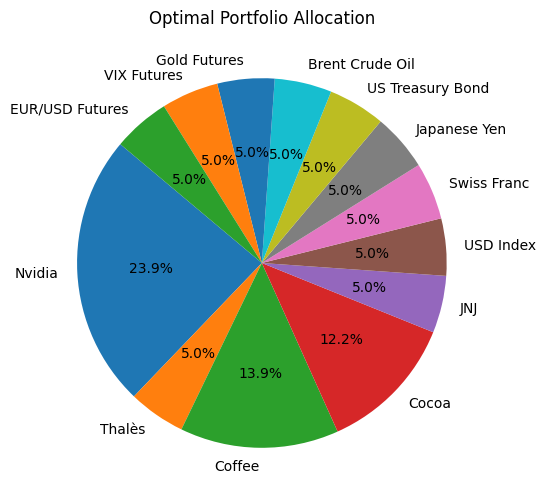

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Step 1: Define asset data
data = {
    "Asset": ["Nvidia", "Thalès", "Coffee", "Cocoa", "JNJ", "USD Index", "Swiss Franc", "Japanese Yen", 
              "US Treasury Bond", "Brent Crude Oil", "Gold Futures", "VIX Futures", "EUR/USD Futures"],
    "Type": ["Equity", "Equity", "Commodity", "Commodity", "Equity", "Currency", "Currency", "Currency", 
             "Bond", "Commodity", "Commodity", "Derivative", "Derivative"],
    "Annual Return": [1.7943, 0.303, 0.6881, 1.6917, -0.104, 0.0580, 0.0726, 0.1200, 
                      0.1518, -0.0198, 0.2624, 0.3182, -0.0567],
    "Annual Volatility": [0.5250, 0.2487, 0.3586, 0.711, 0.1518, 0.0564, 0.0706, 0.1008, 
                          0.2219, 0.2646, 0.1501, 1.5032, 0.0586]
}
portfolio_data = pd.DataFrame(data)

# Step 2: Define optimization parameters
returns = portfolio_data["Annual Return"].values
volatilities = portfolio_data["Annual Volatility"].values
cov_matrix = np.diag(volatilities ** 2)  # Approximation with diagonal covariance matrix
risk_free_rate = 0.05  # Risk-free rate (5%)
max_investment = 10_000_000  # Maximum investment amount

# Step 3: Portfolio performance functions
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

def sharpe_ratio(weights, returns, cov_matrix, risk_free_rate):
    portfolio_return, portfolio_volatility = portfolio_performance(weights, returns, cov_matrix)
    return -(portfolio_return - risk_free_rate) / portfolio_volatility  # Negative for maximization

# Step 4: Constraints
num_assets = len(returns)
initial_weights = np.ones(num_assets) / num_assets
bounds = [(0.05, 0.5)] * num_assets  # Each asset must have at least 5% and at most 50%
constraints = [
    {"type": "eq", "fun": lambda w: np.sum(w) - 1},  # Weights must sum to 1
]

# Step 5: Optimization for allocation
result = minimize(
    sharpe_ratio,
    initial_weights,
    args=(returns, cov_matrix, risk_free_rate),
    method="SLSQP",
    bounds=bounds,
    constraints=constraints
)

optimal_weights = result.x

# Step 6: Determine how much to invest
# Calculate the return and volatility of the optimized portfolio
optimal_return, optimal_volatility = portfolio_performance(optimal_weights, returns, cov_matrix)
optimal_sharpe = (optimal_return - risk_free_rate) / optimal_volatility

# Decide on the investment amount based on expected return and volatility
investment_fraction = optimal_return / (optimal_return + optimal_volatility)  # A heuristic approach
investment_amount = investment_fraction * max_investment

# Scale weights by the chosen investment amount
scaled_weights = optimal_weights * investment_amount

# Step 7: Display results
portfolio_data["Allocation (%)"] = optimal_weights * 100
portfolio_data["Investment (USD)"] = scaled_weights

print("\nOptimized Portfolio Allocations:")
print(portfolio_data[["Asset", "Type", "Allocation (%)", "Investment (USD)"]])
print(f"\nTotal Investment: ${investment_amount:,.2f}")
print(f"Portfolio Expected Return: {optimal_return * 100:.2f}%")
print(f"Portfolio Volatility: {optimal_volatility * 100:.2f}%")
print(f"Portfolio Sharpe Ratio: {optimal_sharpe:.2f}")

# Step 8: Visualization
plt.figure(figsize=(10, 6))
plt.pie(optimal_weights, labels=portfolio_data["Asset"], autopct="%1.1f%%", startangle=140)
plt.title("Optimal Portfolio Allocation")
plt.show()

In [12]:
pip install --upgrade pandas yfinance

  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.51
    Uninstalling yfinance-0.2.51:
      Successfully uninstalled yfinance-0.2.51
Note: you may need to restart the kernel to use updated packages.


In [5]:
import requests
import pandas as pd
import time

# Liste des actifs et leurs tickers Yahoo Finance
tickers = {
    "Nvidia": "NVDA",
    "Thalès": "HO.PA",
    "Coffee": "KC=F",
    "Cocoa": "CC=F",
    "Johnson and Johnson": "JNJ",
    "USD Index": "DX-Y.NYB",
    "Swiss Franc": "CHF=X",
    "Japanese Yen": "JPY=X",
    "US Treasury Bond": "^TNX",
    "Brent Crude Oil": "BZ=F",
    "Gold Futures": "GC=F",
    "VIX Futures": "^VIX",
    "EUR/USD Futures": "EURUSD=X",
}

# Définition de la période
start_date = "2025-01-15"
end_date = "2025-03-12"

start_timestamp = int(pd.Timestamp(start_date).timestamp())  # Début en timestamp UNIX
end_timestamp = int(pd.Timestamp(end_date).timestamp())  # Fin en timestamp UNIX

def fetch_all_data(tickers, start_timestamp, end_timestamp):
    """Télécharge les prix de clôture pour tous les actifs d'une seule requête"""
    price_data = {}

    for name, ticker in tickers.items():
        print(f"🔄 Récupération des données pour {name} ({ticker})...")
        url = f"https://query2.finance.yahoo.com/v8/finance/chart/{ticker}?period1={start_timestamp}&period2={end_timestamp}&interval=1d"
        
        try:
            response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
            data = response.json()

            timestamps = data["chart"]["result"][0]["timestamp"]
            prices = data["chart"]["result"][0]["indicators"]["quote"][0]["close"]

            # Convertir timestamps en dates sans heures
            dates = pd.to_datetime(timestamps, unit="s").date
            price_data[name] = pd.Series(prices, index=dates)

            print(f"✅ Données récupérées pour {name}.")

        except Exception as e:
            print(f"❌ Erreur lors de la récupération des données pour {name}: {e}")
            price_data[name] = None
    
    return price_data

# Exécuter la récupération de toutes les données
price_data = fetch_all_data(tickers, start_timestamp, end_timestamp)

# Transformer en DataFrame
price_df = pd.DataFrame(price_data)

# Supprimer les doublons potentiels et ne garder qu'une ligne par jour
price_df = price_df.groupby(price_df.index).last()

# Remplir les éventuelles données manquantes
price_df.fillna(method="ffill", inplace=True)

# Réenregistrer avec un format propre (une seule ligne par jour)
price_df.to_csv("historical_prices_cleaned.csv", index=True)

print("📊 ✅ Données stockées localement dans 'historical_prices_cleaned.csv' (1 ligne par jour)")

🔄 Récupération des données pour Nvidia (NVDA)...
✅ Données récupérées pour Nvidia.
🔄 Récupération des données pour Thalès (HO.PA)...
✅ Données récupérées pour Thalès.
🔄 Récupération des données pour Coffee (KC=F)...
✅ Données récupérées pour Coffee.
🔄 Récupération des données pour Cocoa (CC=F)...
✅ Données récupérées pour Cocoa.
🔄 Récupération des données pour Johnson and Johnson (JNJ)...
✅ Données récupérées pour Johnson and Johnson.
🔄 Récupération des données pour USD Index (DX-Y.NYB)...
✅ Données récupérées pour USD Index.
🔄 Récupération des données pour Swiss Franc (CHF=X)...
✅ Données récupérées pour Swiss Franc.
🔄 Récupération des données pour Japanese Yen (JPY=X)...
✅ Données récupérées pour Japanese Yen.
🔄 Récupération des données pour US Treasury Bond (^TNX)...
✅ Données récupérées pour US Treasury Bond.
🔄 Récupération des données pour Brent Crude Oil (BZ=F)...
✅ Données récupérées pour Brent Crude Oil.
🔄 Récupération des données pour Gold Futures (GC=F)...
✅ Données récupérée

/var/folders/23/p01lnkd12477bfyr7h43lzpr0000gn/T/ipykernel_84421/2290193875.py:66: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_df.fillna(method="ffill", inplace=True)


In [6]:
import pandas as pd
import numpy as np

# 📂 Charger les prix historiques
price_df = pd.read_csv("historical_prices_cleaned.csv", index_col=0, parse_dates=True)

# 📌 Définition des allocations initiales et du capital total
initial_allocations = {
    "Nvidia": 0.239,
    "Thalès": 0.122,
    "Coffee": 0.139, 
    "Cocoa": 0.05,
    "Johnson and Johnson": 0.05,
    "USD Index": 0.05,
    "Swiss Franc": 0.05,
    "Japanese Yen": 0.05,
    "US Treasury Bond": 0.05,
    "Brent Crude Oil": 0.05,
    "Gold Futures": 0.05,
    "VIX Futures": 0.05,
    "EUR/USD Futures": 0.05,
}

total_investment = 10000000  # 💰 Capital initial
SIGNIFICANT_CHANGE_THRESHOLD = 0.5 / 100  # 📊 Seuil pour recommandation

# 📌 Fonction pour générer les recommandations d’achat/vente
def generate_recommendations(asset, current_price, prev_price, allocation, portfolio_value):
    if prev_price is None or current_price is None:
        return "Hold", 0  # Aucune action si prix manquant

    price_change = (current_price - prev_price) / prev_price
    if abs(price_change) > SIGNIFICANT_CHANGE_THRESHOLD:
        target_allocation = allocation * (1 + price_change)  # Ajustement dynamique
        target_value = target_allocation * portfolio_value
        current_value = allocation * portfolio_value
        difference = target_value - current_value

        if difference > 0:
            return f"Buy ${abs(difference):.2f}", difference
        else:
            return f"Sell ${abs(difference):.2f}", difference
    return "Hold", 0

# 📌 Fonction pour mettre à jour les allocations après transaction
def update_allocations(current_allocations, recommendations, portfolio_value):
    for asset, (_, amount) in recommendations.items():
        change = amount / portfolio_value if portfolio_value > 0 else 0
        if amount > 0:  # Achat
            current_allocations[asset] += change
        elif amount < 0:  # Vente
            current_allocations[asset] += change

    # Normalisation pour s'assurer que la somme des allocations reste 1
    total_allocation = sum(current_allocations.values())
    for asset in current_allocations:
        current_allocations[asset] /= total_allocation
    return current_allocations

# 📌 Fonction principale pour suivre l’évolution du portefeuille
def generate_portfolio_csv(price_df, initial_allocations, total_investment):
    current_allocations = initial_allocations.copy()
    reference_prices = {}  # Prix de référence pour calcul des contributions
    last_prices = {}  # Dernier prix enregistré
    portfolio_data = []  # Stockage des données du portfolio

    for date, row in price_df.iterrows():
        print(f"📅 Analyse du {date.strftime('%Y-%m-%d')}")
        day_data = []
        portfolio_value = 0
        recommendations = {}

        for asset in initial_allocations.keys():
            current_price = row[asset] if not pd.isna(row[asset]) else None
            prev_price = price_df.loc[:date].dropna()[asset].shift(1).iloc[-1] if not price_df.loc[:date].dropna().empty else None

            if current_price is not None:
                last_prices[asset] = current_price
                if asset not in reference_prices:
                    reference_prices[asset] = current_price

                allocation = current_allocations.get(asset, 0)
                investment = allocation * total_investment
                contribution = investment * (current_price / reference_prices[asset])
                portfolio_value += contribution

                # 📌 Générer recommandation d'achat/vente
                recommendation, amount = generate_recommendations(asset, current_price, prev_price, allocation, total_investment)
                recommendations[asset] = (recommendation, amount)

                day_data.append([asset, date.strftime('%Y-%m-%d'), current_price, allocation * 100, investment, contribution, recommendation])
            else:
                day_data.append([asset, date.strftime('%Y-%m-%d'), None, None, None, None, "Hold"])

        # 📌 Mettre à jour les allocations après ajustement
        current_allocations = update_allocations(current_allocations, recommendations, portfolio_value)

        # 📊 Ajouter la valeur totale du portefeuille
        day_data.append(["Portfolio Value", date.strftime('%Y-%m-%d'), None, None, None, portfolio_value, None])
        portfolio_data.extend(day_data)

    # 📂 Sauvegarde en CSV
    columns = ["Asset", "Date", "Close Price", "Allocation (%)", "Investment (USD)", "Contribution to Portfolio", "Recommendation"]
    portfolio_df = pd.DataFrame(portfolio_data, columns=columns)
    portfolio_df.to_csv("dynamic_portfolio_tracking.csv", index=False)
    
    print("📊 ✅ Suivi du portefeuille stocké dans 'dynamic_portfolio_tracking.csv'")

# 📌 Exécution du suivi du portefeuille
generate_portfolio_csv(price_df, initial_allocations, total_investment)

📅 Analyse du 2025-01-15
📅 Analyse du 2025-01-16
📅 Analyse du 2025-01-17
📅 Analyse du 2025-01-19
📅 Analyse du 2025-01-20
📅 Analyse du 2025-01-21
📅 Analyse du 2025-01-22
📅 Analyse du 2025-01-23
📅 Analyse du 2025-01-24
📅 Analyse du 2025-01-26
📅 Analyse du 2025-01-27
📅 Analyse du 2025-01-28
📅 Analyse du 2025-01-29
📅 Analyse du 2025-01-30
📅 Analyse du 2025-01-31
📅 Analyse du 2025-02-02
📅 Analyse du 2025-02-03
📅 Analyse du 2025-02-04
📅 Analyse du 2025-02-05
📅 Analyse du 2025-02-06
📅 Analyse du 2025-02-07
📅 Analyse du 2025-02-09
📅 Analyse du 2025-02-10
📅 Analyse du 2025-02-11
📅 Analyse du 2025-02-12
📅 Analyse du 2025-02-13
📅 Analyse du 2025-02-14
📅 Analyse du 2025-02-16
📅 Analyse du 2025-02-17
📅 Analyse du 2025-02-18
📅 Analyse du 2025-02-19
📅 Analyse du 2025-02-20
📅 Analyse du 2025-02-21
📅 Analyse du 2025-02-23
📅 Analyse du 2025-02-24
📅 Analyse du 2025-02-25
📅 Analyse du 2025-02-26
📅 Analyse du 2025-02-27
📅 Analyse du 2025-02-28
📅 Analyse du 2025-03-02
📅 Analyse du 2025-03-03
📅 Analyse du 202

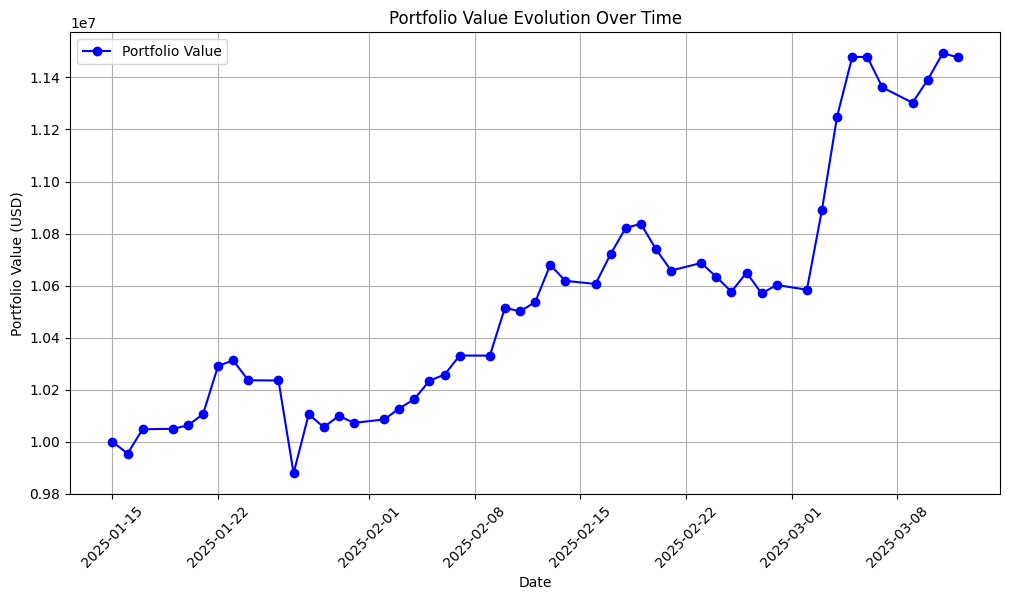

<Figure size 1200x600 with 0 Axes>

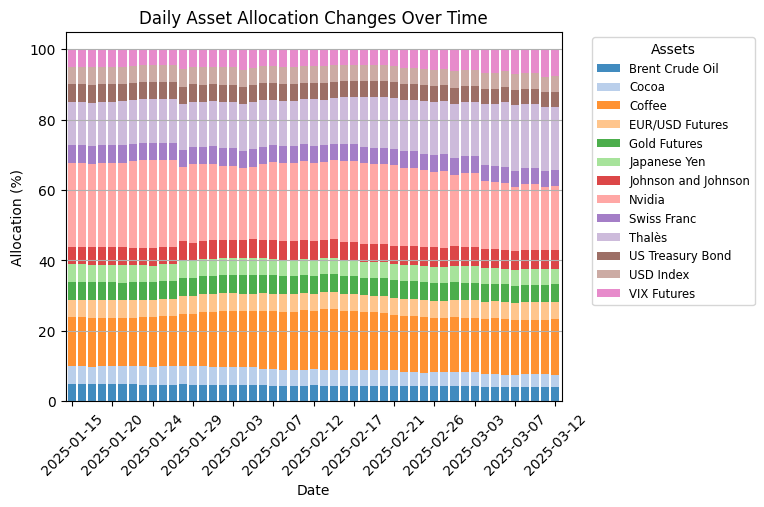

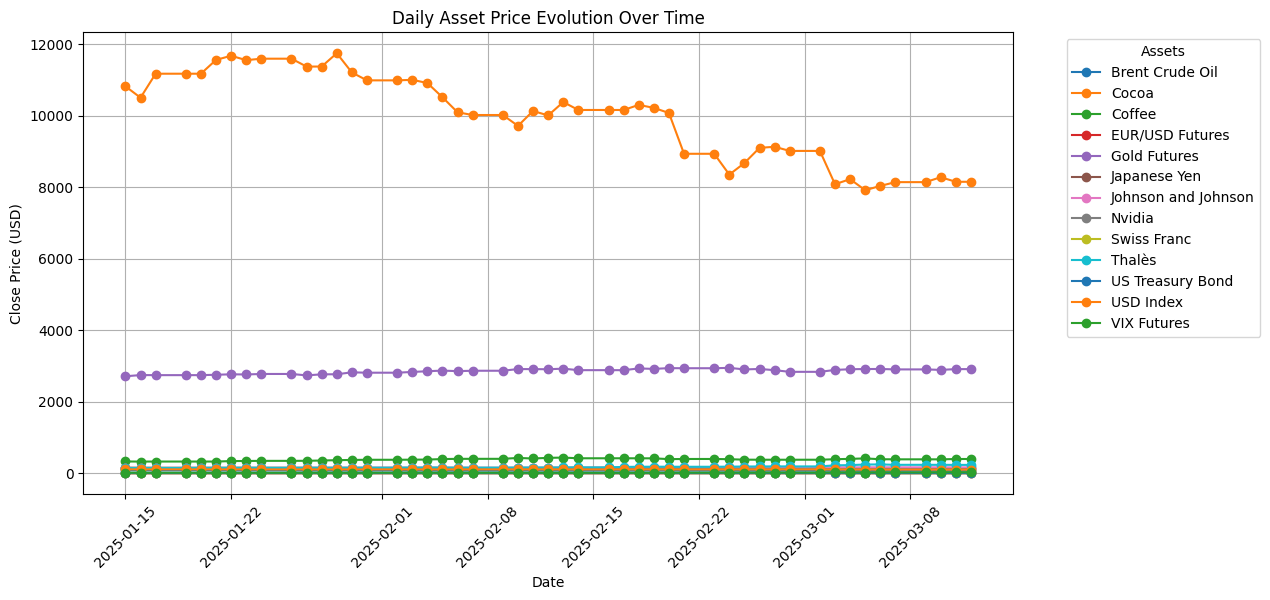

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_portfolio_evolution(csv_filename):
    """Generate graphs for asset allocation evolution, portfolio value, and asset price evolution over time."""
    
    # Load data
    df = pd.read_csv(csv_filename)

    # Convert date column to datetime
    df["Date"] = pd.to_datetime(df["Date"])

    # Filter out portfolio value rows
    portfolio_df = df[df["Asset"] == "Portfolio Value"].copy()
    asset_df = df[df["Asset"] != "Portfolio Value"].copy()

    # Convert allocation percentages and prices to numeric values
    asset_df["Allocation (%)"] = pd.to_numeric(asset_df["Allocation (%)"], errors="coerce")
    asset_df["Close Price"] = pd.to_numeric(asset_df["Close Price"], errors="coerce")

    # Convert investment values to numeric
    portfolio_df["Contribution to Portfolio"] = pd.to_numeric(portfolio_df["Contribution to Portfolio"], errors="coerce")

    ### **Plot Portfolio Value Evolution (Line Chart)**
    plt.figure(figsize=(12, 6))
    plt.plot(portfolio_df["Date"], portfolio_df["Contribution to Portfolio"], marker="o", linestyle="-", color="blue", label="Portfolio Value")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value (USD)")
    plt.title("Portfolio Value Evolution Over Time")
    plt.legend()
    plt.grid(True)

    # Format x-axis ticks with dates
    plt.xticks(rotation=45)
    plt.show()

    # Call the function to plot asset allocation
    plot_portfolio_allocation(asset_df)

    ### **Plot Asset Price Evolution (Single Line Chart for All Assets)**
    price_pivot = asset_df.pivot(index="Date", columns="Asset", values="Close Price")

    plt.figure(figsize=(12, 6))
    for column in price_pivot.columns:
        plt.plot(price_pivot.index, price_pivot[column], marker="o", linestyle="-", label=column)

    plt.xlabel("Date")
    plt.ylabel("Close Price (USD)")
    plt.title("Daily Asset Price Evolution Over Time")
    plt.legend(title="Assets", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)

    plt.xticks(rotation=45)
    plt.show()


def plot_portfolio_allocation(asset_df):
    """Plot Daily Asset Allocation Changes Over Time with improved readability."""
    
    # Convert date column to datetime and extract only the date part (removing timestamps)
    asset_df["Date"] = asset_df["Date"].dt.date

    # Pivot data to get assets as columns
    allocation_pivot = asset_df.pivot(index="Date", columns="Asset", values="Allocation (%)")

    # Generate a distinct color palette (using "tab20" to ensure enough variety)
    num_assets = len(allocation_pivot.columns)
    colors = plt.colormaps.get_cmap("tab20").colors[:num_assets]  # Updated color mapping

    # Plot stacked bar chart
    plt.figure(figsize=(12, 6))
    allocation_pivot.plot(kind="bar", stacked=True, color=colors, alpha=0.85, width=0.8)

    plt.xlabel("Date")
    plt.ylabel("Allocation (%)")
    plt.title("Daily Asset Allocation Changes Over Time")
    plt.legend(title="Assets", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")
    plt.grid(axis="y")

    # Format x-axis: show fewer date labels for better readability
    plt.xticks(range(0, len(allocation_pivot.index), max(1, len(allocation_pivot.index) // 10)), 
               [str(d) for d in allocation_pivot.index[::max(1, len(allocation_pivot.index) // 10)]], 
               rotation=45)

    plt.show()

# Call the function using the latest generated CSV file
plot_portfolio_evolution("dynamic_portfolio_tracking.csv")

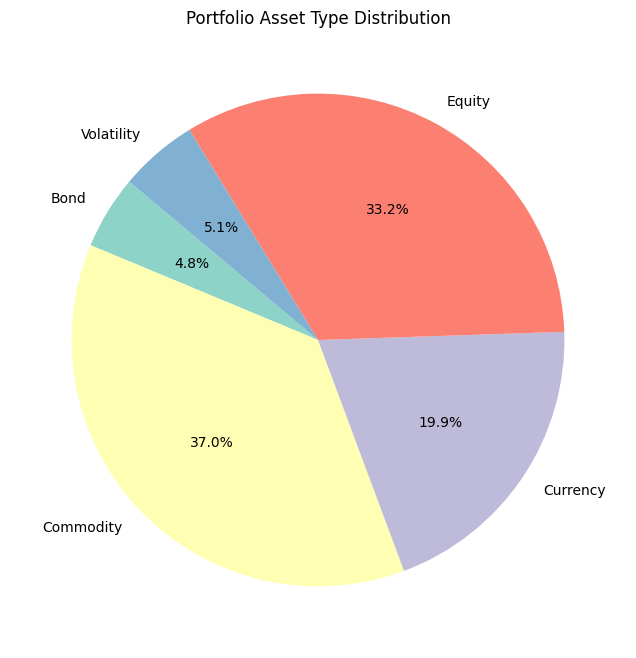

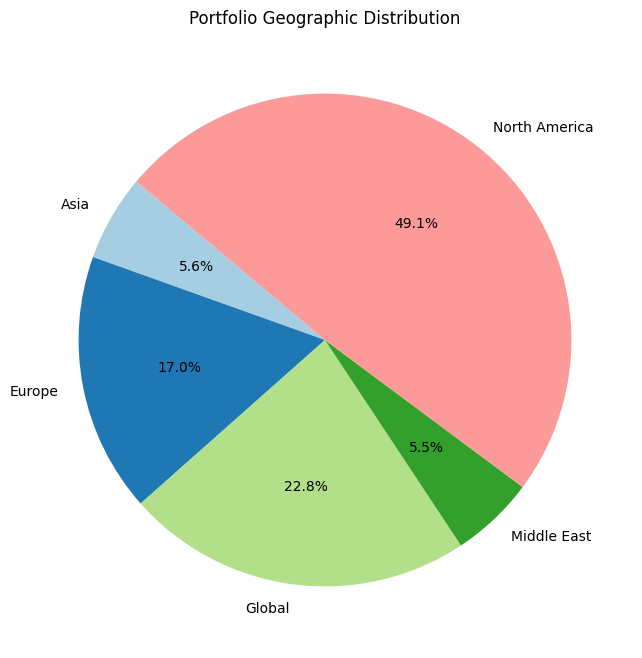

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_pie_charts(csv_filename, asset_types, asset_regions):
    """
    Generate two pie charts:
    1. Asset type distribution (Equities, Bonds, etc.).
    2. Geographic distribution of assets (North America, Europe, etc.).
    """
    # Load data
    df = pd.read_csv(csv_filename)

    # Filter out Portfolio Value rows
    asset_df = df[df["Asset"] != "Portfolio Value"].copy()

    # Convert Allocation (%) to numeric
    asset_df["Allocation (%)"] = pd.to_numeric(asset_df["Allocation (%)"], errors="coerce")

    ### Pie Chart 1: Asset Type Distribution
    asset_df["Type"] = asset_df["Asset"].map(asset_types)  # Map each asset to its type
    type_distribution = asset_df.groupby("Type")["Allocation (%)"].sum()

    plt.figure(figsize=(8, 8))
    plt.pie(
        type_distribution,
        labels=type_distribution.index,
        autopct="%1.1f%%",
        startangle=140,
        colors=plt.cm.Set3.colors,
    )
    plt.title("Portfolio Asset Type Distribution")
    plt.show()

    ### Pie Chart 2: Geographic Distribution
    asset_df["Region"] = asset_df["Asset"].map(asset_regions)  # Map each asset to its region
    region_distribution = asset_df.groupby("Region")["Allocation (%)"].sum()

    plt.figure(figsize=(8, 8))
    plt.pie(
        region_distribution,
        labels=region_distribution.index,
        autopct="%1.1f%%",
        startangle=140,
        colors=plt.cm.Paired.colors,
    )
    plt.title("Portfolio Geographic Distribution")
    plt.show()


# Define asset types (adjust based on your assets)
asset_types = {
    "Nvidia": "Equity",
    "Thalès": "Equity",
    "Coffee": "Commodity",
    "Cocoa": "Commodity",
    "Johnson and Johnson": "Equity", 
    "USD Index": "Currency",
    "Swiss Franc": "Currency",
    "Japanese Yen": "Currency",
    "US Treasury Bond": "Bond",
    "Brent Crude Oil": "Commodity",
    "Gold Futures": "Commodity",
    "VIX Futures": "Volatility",
    "EUR/USD Futures": "Currency",
}

# Define asset regions (adjust based on your assets)
asset_regions = {
    "Nvidia": "North America",
    "Thalès": "Europe",
    "Coffee": "Global",
    "Cococa": "Global",
    "Johnson and Johnson": "North America", 
    "USD Index": "North America",
    "Swiss Franc": "Europe",
    "Japanese Yen": "Asia",
    "US Treasury Bond": "North America",
    "Brent Crude Oil": "Middle East",
    "Gold Futures": "Global",
    "VIX Futures": "North America",
    "EUR/USD Futures": "Europe",
}

# Call the function using the latest generated CSV file
plot_pie_charts("dynamic_portfolio_tracking.csv", asset_types, asset_regions)

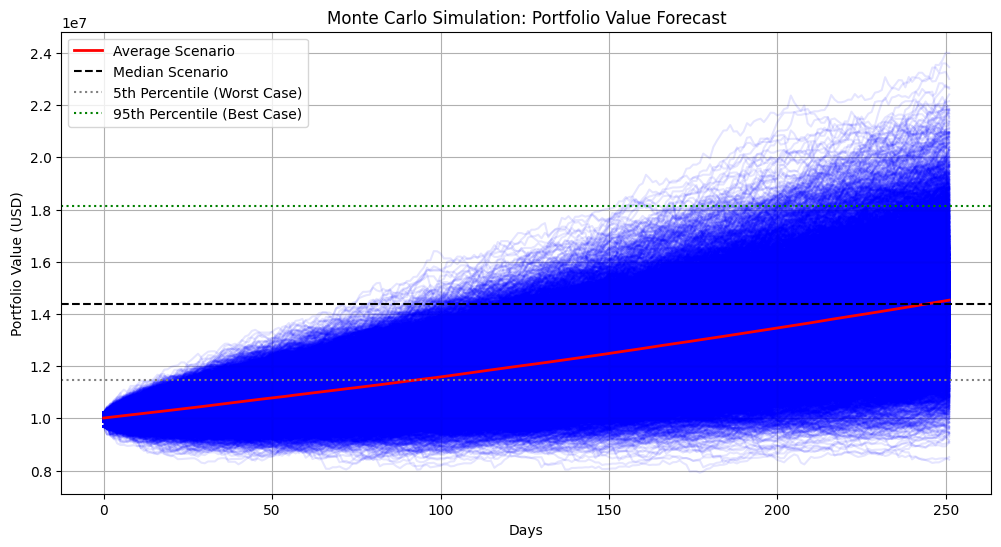


📊 Portfolio Value Forecast Summary (After 1 Year):
🔴 Worst-case scenario (5th percentile): $11,473,739.75
🟠 Conservative scenario (25th percentile): $13,078,559.40
⚪️ Median scenario (50th percentile): $14,390,976.00
🟢 Optimistic scenario (75th percentile): $15,827,743.16
✅ Best-case scenario (95th percentile): $18,129,552.75


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load historical price data
price_df = pd.read_csv("historical_prices_cleaned.csv", index_col=0, parse_dates=True)

# Define initial asset allocations and total investment
initial_allocations = {
    "Nvidia": 0.239,
    "Thalès": 0.122,
    "Coffee": 0.139, 
    "Cocoa": 0.05,
    "Johnson and Johnson": 0.05,
    "USD Index": 0.05,
    "Swiss Franc": 0.05,
    "Japanese Yen": 0.05,
    "US Treasury Bond": 0.05,
    "Brent Crude Oil": 0.05,
    "Gold Futures": 0.05,
    "VIX Futures": 0.05,
    "EUR/USD Futures": 0.05,
}

total_investment = 10_000_000  # Initial portfolio value in USD
num_simulations = 10_000  # Number of Monte Carlo simulations
forecast_days = 252  # Forecasting period (1 year of trading days)

# Compute historical daily returns
returns_df = price_df.pct_change().dropna()

# Monte Carlo simulation
simulated_portfolios = np.zeros((num_simulations, forecast_days))

for i in range(num_simulations):
    # Generate random returns based on historical data
    simulated_returns = returns_df.sample(n=forecast_days, replace=True).values
    # Apply these returns to the initial investment
    simulated_growth = np.cumprod(1 + simulated_returns @ np.array(list(initial_allocations.values()))) * total_investment
    simulated_portfolios[i, :] = simulated_growth

# Plot the Monte Carlo forecast
plt.figure(figsize=(12, 6))
plt.plot(range(forecast_days), simulated_portfolios.T, alpha=0.1, color="blue")
plt.xlabel("Days")
plt.ylabel("Portfolio Value (USD)")
plt.title("Monte Carlo Simulation: Portfolio Value Forecast")
plt.grid(True)

# Add the mean projection line
mean_projection = simulated_portfolios.mean(axis=0)
plt.plot(range(forecast_days), mean_projection, color="red", label="Average Scenario", linewidth=2)

# Highlight percentile scenarios
percentiles = np.percentile(simulated_portfolios[:, -1], [5, 25, 50, 75, 95])
plt.axhline(percentiles[2], color="black", linestyle="--", label="Median Scenario")
plt.axhline(percentiles[0], color="gray", linestyle="dotted", label="5th Percentile (Worst Case)")
plt.axhline(percentiles[4], color="green", linestyle="dotted", label="95th Percentile (Best Case)")

plt.legend()
plt.show()

# Print summary of results
print("\n📊 Portfolio Value Forecast Summary (After 1 Year):")
print(f"🔴 Worst-case scenario (5th percentile): ${percentiles[0]:,.2f}")
print(f"🟠 Conservative scenario (25th percentile): ${percentiles[1]:,.2f}")
print(f"⚪️ Median scenario (50th percentile): ${percentiles[2]:,.2f}")
print(f"🟢 Optimistic scenario (75th percentile): ${percentiles[3]:,.2f}")
print(f"✅ Best-case scenario (95th percentile): ${percentiles[4]:,.2f}")

In [1]:
import pandas as pd

# Charger les données du portefeuille
portfolio_df = pd.read_csv("dynamic_portfolio_tracking.csv")

# Extraire uniquement les valeurs du portefeuille
portfolio_values = portfolio_df[portfolio_df["Asset"] == "Portfolio Value"]

# Convertir la colonne "Contribution to Portfolio" en valeur numérique
portfolio_values["Contribution to Portfolio"] = pd.to_numeric(portfolio_values["Contribution to Portfolio"], errors='coerce')

# Récupérer la première et la dernière valeur du portefeuille
initial_value = portfolio_values["Contribution to Portfolio"].iloc[0]
final_value = portfolio_values["Contribution to Portfolio"].iloc[-1]

# Calcul du rendement du portefeuille
portfolio_return = (final_value - initial_value) / initial_value * 100

print(f"📊 Portfolio Return over 60 days: {portfolio_return:.2f}%")

📊 Portfolio Return over 60 days: 14.78%


/var/folders/23/p01lnkd12477bfyr7h43lzpr0000gn/T/ipykernel_90288/4253754252.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio_values["Contribution to Portfolio"] = pd.to_numeric(portfolio_values["Contribution to Portfolio"], errors='coerce')
